# Análise de Churn

## Contexto
Esse é um projeto de análise de churn que desenvolvi como parte do meu portfólio, simulando um contexto real de negócio.

Nesse contexto eu atuo como analista de dados em uma empresa de tecnologia que oferece soluções no modelo Software as a Service (SaaS). Isso significa que os clientes utilizam o sistema da empresa por meio de assinaturas, em geral com pagamentos recorrentes mensais, trimestrais ou anuais.

O produto principal da empresa é um sistema de ERP (Enterprise Resource Planning), um tipo de software utilizado por pequenas e médias empresas para gerenciar rotinas administrativas, como emissão de notas fiscais, controle de estoque, financeiro, entre outras.

A empresa identificou a necessidade de compreender melhor o comportamento de churn dos seus clientes, uma vez que o cancelamento de assinaturas impacta diretamente a previsibilidade de receita e o crescimento do negócio. O churn, neste contexto, ocorre a partir do seguinte fluxo:

##### vencimento do período do contrato -> overdue(contrato em atraso) -> churn(não renovação do contrato)

Para apoiar a tomada de decisão, foi disponibilizado um conjunto de bases de dados contendo informações cadastrais, contratuais e de uso da plataforma. O objetivo da análise é identificar padrões e fatores associados ao churn, compreender quais perfis de clientes apresentam maior risco de evasão e propor ações práticas para mitigá-lo.

<b>Sua missão:</b>

* Realizar uma análise exploratória para identificar padrões, comportamentos ou informações relevantes que possam apoiar a equipe de negócios;
* Elaborar um relatório com os principais insights obtidos.


<b>Perguntas-gatilho para orientar a análise:</b>

* Há diferença de churn entre planos mensais, trimestrais e anuais?
* O uso da plataforma é menor entre os clientes que cancelaram?
* Empresas com contador têm menor probabilidade de churn?
* Determinados setores ou portes de empresa apresentam maior rotatividade?

## Dicionário de Variáveis

| Variável                                                        | Descrição                                                                                 |
|------------------------------------------------------------------|-------------------------------------------------------------------------------------------|
| **ID**                                                           | Identificador único para cada cliente.                                                   |
| **Tipo de empresa**                                              | Categoria da empresa, como MEI, ME, EPP, etc.                                            |
| **Fundação da empresa**                                          | Ano de fundação da empresa.                                                              |
| **Possui mais de um sócio**                                      | Indica se a empresa possui mais de um sócio (Sim/Não).                                   |
| **Funcionários**                                                 | Número de funcionários na empresa ou faixa categorizada.                                 |
| **mes_churn**                                                  | Indica em que mês houve o churn.                                                   |
| **Meses de permanência**                                         | Quantidade de meses desde o início do contrato até maio de 2025.                         |
| **Utiliza serviços financeiros**                                 | Indica se a empresa utiliza serviços financeiros (Sim/Não).                              |
| **PossuiContador**                                               | Indica se a empresa possui contador (Sim/Não).                                           |
| **Faz conciliação bancária**                                     | Indica se a empresa realiza conciliação bancária (manual ou automática).                 |
| **Frequência: Módulo financeiro**                                | Frequência de utilização do módulo financeiro do sistema (ex: Pouco uso, Uso frequente). |
| **Frequência: Emissão de nota fiscal**                           | Frequência de utilização da emissão de nota fiscal no sistema.                           |
| **Frequência: Integração bancária**                              | Frequência de utilização da integração bancária no sistema.                              |
| **Frequência: Módulo de vendas**                                 | Frequência de utilização do módulo de vendas no sistema.                                 |
| **Frequência: Relatórios**                                       | Frequência de utilização de relatórios no sistema.                                       |
| **Frequência: APIs de integração**                               | Frequência de utilização de APIs de integração no sistema.                               |
| **Contrato**                                                     | Tipo de contrato com o cliente (ex: Mês-a-mês, Trimestral, Anual).                       |
| **Emite boletos**                                                | Indica se a empresa emite boletos (Sim/Não ou 1/0).                                       |
| **Tipo de pagamento**                                            | Método de pagamento utilizado pelo cliente.                                              |
| **Receita mensal**                                               | Receita mensal gerada pelo cliente.                                                      |
| **Receita total**                                                | Receita total acumulada pelo cliente ao longo da permanência.                            |
| **Churn**                                                        | Indica se houve churn (cancelamento) do cliente (Sim/Não).                               |


## Hipóteses iniciais

Antes de iniciar a análise exploratória, foram formuladas as seguintes hipóteses com base no conhecimento do negócio e em intuições analíticas:

- Empresas nos primeiros meses de contrato apresentam maior taxa de churn.
- Empresas com assinaturas mês-a-mês apresentam mais churn do que as trimestrais e anuais.
- Empresas de menor porte tendem a apresentar maior churn quando comparadas a empresas mais estruturadas.
- Empresas com menor número de funcionários e sócios apresentam maior risco de churn.

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

# Helper Functions

In [2]:
def print_separator(headline, width=50):
    print('\n' + '=' * width)
    print(headline.upper().center(width))
    print('=' * width + '\n')

# Data Loading

In [3]:
df = pd.read_csv('customer_churn_with_months.csv')

In [4]:
df.head()

,ID,Tipo de empresa,Fundação da empresa,Possui mais de um sócio,Funcionários,Meses de permanência,Utiliza serviços financeiros,PossuiContador,Faz conciliação bancária,Frequência de utilização de feature do sistema: Módulo financeiro,...,Frequência de utilização de feature do sistema: Relatórios,Frequência de utilização de feature do sistema: Utilização de APIs de integração,Contrato,Emite boletos,Emite boletos.1,Tipo de pagamento,Receita mensal,Receita total,Churn,mes_churn
0,1,Micro empresa,2016,Sim,até 5 funcionários,1,Não,NaN,automática,Pouco uso,...,Pouco uso,Pouco uso,Mês-a-mês,1,Yes,Boleto - pagamento único,29.85,29.85,Não,NaN
1,2,Pequena empresa,2018,Não,até 5 funcionários,34,Sim,Não,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Boleto - mês a mês,56.95,1889.50,Não,NaN
2,4,Pequena empresa,2016,Não,até 5 funcionários,45,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Trimestral,0,No,Cartão de crédito - pagamento único,42.30,1840.75,Não,NaN
3,7,Pequena empresa,2019,Não,6 ou mais funcionários,22,Sim,Sim,manual,Pouco uso,...,Uso frequente,Pouco uso,Mês-a-mês,1,Yes,Cartão de crédito - mês a mês,89.10,1949.40,Não,NaN
4,8,Micro empresa,2019,Não,até 5 funcionários,10,Não,NaN,automática,Uso frequente,...,Pouco uso,Pouco uso,Mês-a-mês,0,No,Boleto - mês a mês,29.75,301.90,Não,NaN


## Data Description

In [5]:
df.shape

(7043, 23)

In [6]:
overview = pd.DataFrame({
    'datatype': df.dtypes,
    'nº_nulos': df.isnull().sum(),
    '%_nulos': df.isnull().mean(),
    'valores_únicos': df.nunique(),
    'exemplo_valores_únicos': df.apply(lambda x: x.unique()[:3])
    
})

overview

,datatype,nº_nulos,%_nulos,valores_únicos,exemplo_valores_únicos
ID,int64,0,0.000000,7043,"[1, 2, 4]"
Tipo de empresa,object,0,0.000000,2,"[Micro empresa, Pequena empresa]"
Fundação da empresa,int64,0,0.000000,21,"[2016, 2018, 2019]"
Possui mais de um sócio,object,0,0.000000,2,"[Sim, Não]"
Funcionários,object,0,0.000000,2,"[até 5 funcionários, 6 ou mais funcionários]"
Meses de permanência,int64,0,0.000000,73,"[1, 34, 45]"
Utiliza serviços financeiros,object,0,0.000000,2,"[Não, Sim]"
PossuiContador,object,682,0.096834,2,"[nan, Não , Sim]"
Faz conciliação bancária,object,0,0.000000,3,"[automática, manual, não faz]"
Frequência de utilização de feature do sistema: Módulo financeiro,object,0,0.000000,3,"[Pouco uso, Uso frequente, Nunca utilizou]"


## Columns Rename

In [7]:
df.columns = [
    'id',                          # 'ID',
    'tipo_empresa',                # 'Tipo de empresa',
    'fund_empresa',                # 'Fundação da empresa',
    'has_mais_socio',              # 'Possui mais de um sócio',
    'num_func',                    # 'Funcionários',
    'meses_perman',                # 'Meses de permanência ',
    'util_serv_financ',            # 'Utiliza serviços financeiros',
    'has_contador',                # 'PossuiContador',
    'has_conc_banc',               # 'Faz conciliação bancária',
    'freq_mod_financ',             # 'Frequência de utilização de feature do sistema: Módulo financeiro',
    'freq_mod_emissao_nf',         # 'Frequência de utilização de feature do sistema: Emissão de nota fiscal',
    'freq_mod_int_banc',           # 'Frequência de utilização de feature do sistema: Integração bancária',
    'freq_mod_vendas',         # 'Frequência de utilização de feature do sistema: Módulo de vendas',
    'freq_mod_relatorios',         # 'Frequência de utilização de feature do sistema: Relatórios',
    'freq_mod_api',                # 'Frequência de utilização de feature do sistema: Utilização de APIs de integração',
    'contrato',                    # 'Contrato',
    'emite_boletos',               # 'Emite boletos',
    'emite_boletos.1',             # 'Emite boletos.1',
    'tipo_pag',                    # 'Tipo de pagamento',
    'receita_mensal',              # 'Receita mensal',
    'receita_total',               # 'Receita total',
    'churn',                       # 'Churn',
    'mes_churn'                    # 'mes_churn'
    ]

In [8]:
df.drop(columns='emite_boletos.1', inplace=True)

# EDA

In [9]:
df_eda = df.copy()

## Data Separation

In [10]:
num_cols = df_eda.select_dtypes(include='number').columns
cat_cols = df_eda.select_dtypes(exclude='number').columns

df_eda[num_cols] = df_eda[num_cols]  # keep NaNs
df_eda[cat_cols] = df_eda[cat_cols].fillna('NaN')

In [11]:
# Lidando com nulls para fins de EDA
df_eda[num_cols] = df_eda[num_cols]  # keep NaNs
df_eda[cat_cols] = df_eda[cat_cols].fillna('NaN')

## Univariated Analysis

### Churn

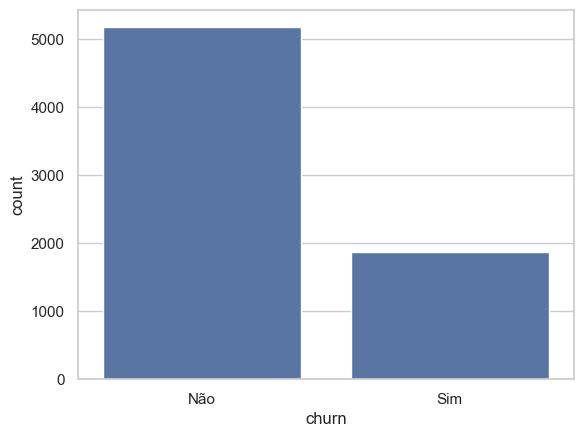


                    FREQUENCY                     

       Frequency  Frequency (normalized)
churn                                   
Não         5174               73.463013
Sim         1869               26.536987

                  UNIQUE VALUES                   

['Não' 'Sim']


In [12]:
col = 'churn'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Churn</b>

Essa é nossa feature principal, dado que é a label identificadora para ocorrência de churn.
É uma variável categórica nominal que pode ser transformada em binária caso seja necessário.
Ela não apresenta nenhum problema formal e não tem dados faltantes.

Ela é bastante desbalanceada:
- 73.4% não fizeram churn.
- 26.5% fez churn.

Isso indica que existe um número importante de clientes fazendo churn mas estes ainda representam uma minoria. 

### Tipo de empresa

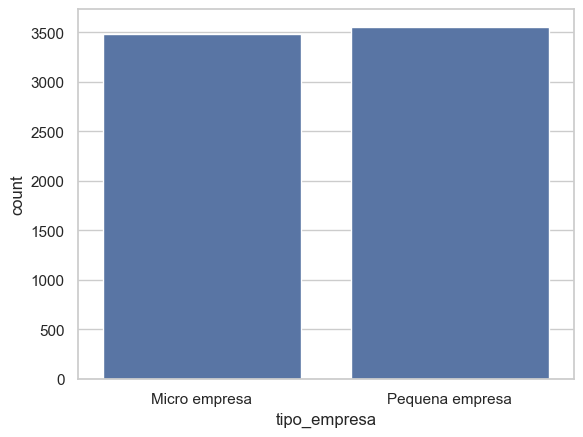


                    FREQUENCY                     

                 Frequency  Frequency (normalized)
tipo_empresa                                      
Pequena empresa       3555                50.47565
Micro empresa         3488                49.52435

                  UNIQUE VALUES                   

['Micro empresa' 'Pequena empresa']


In [13]:
col = 'tipo_empresa'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Tipo de empresa</b>

É uma variável categórica ordinal, dado que representa o tamanho das empresas.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Atualmente todas as empresas da base são micro ou pequenas empresas. Outras categorias podem surgir com o tempo. Ela é bastante balanceada, tendo uma suave maioria de pequenas empresas:
- <b>Pequenas empresas:</b> 50.5%
- <b>Micro empresas:</b> 49.5%
  
Essa é uma feature que parece ser importante para segmentar a variável churn porque empresas maiores tendem a ser mais bem estruturadas e nosso produto ajuda bastante a esse fim.

### Fundação da empresa

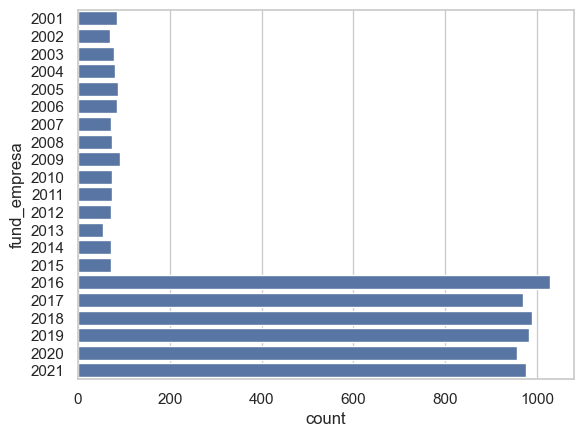


                    FREQUENCY                     

              Frequency  Frequency (normalized)
fund_empresa                                   
2016               1029               14.610251
2018                990               14.056510
2019                982               13.942922
2021                975               13.843533
2017                969               13.758342
2020                956               13.573761
2009                 91                1.292063
2005                 87                1.235269
2001                 85                1.206872
2006                 85                1.206872
2004                 80                1.135880
2003                 79                1.121681
2011                 75                1.064887
2010                 74                1.050689
2008                 74                1.050689
2012                 73                1.036490
2015                 72                1.022292
2007                 71            

In [14]:
col = 'fund_empresa'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, y=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

In [15]:
# Calculando a frequência relativa pós e pré 2016
pos_2016 = (df['fund_empresa'] >= 2016).mean() * 100
pre_2016 = (df['fund_empresa'] < 2016).mean() * 100
print('FREQUÊNCIAS RELATIVAS POR SEGMENTAÇÃO')
print(f"Fundadação a partir de 2016: {pos_2016} %")
print(f"Fundadação antes de 2016: {pre_2016} %")

FREQUÊNCIAS RELATIVAS POR SEGMENTAÇÃO
Fundadação a partir de 2016: 83.78531875621185 %
Fundadação antes de 2016: 16.21468124378816 %


---
<b>Fundação da empresa</b>

É uma variável numérica discreta que representa o ano em que a empresa cliente foi fundada.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

A empresa mais antiga é de 2001 e a mais nova de 2021.

Existe um número muito maior de empresas fundadas a partir de 2016, indicando um possível boom de empreendedorismo dado que são todas pequenas ou micro empresas. Outra hipótese é que alguma ação de marketing ou novo produto fez com que nossa empresa tivesse maior aderência no mercado. Esse fenômeno é algo importante e poderá ser investigado em outra análise para identificarmos o que exatamente aumentou tanto nossa base de clientes.

A variável é bem desbalanceada, tendo uma notável maioria de empresas fundadas após 2016:
- <b>A partir de 2016:</b> 83.8%
- <b>Antes de 2016:</b> 16.2%

Essa é uma feature que parece ser importante para segmentar a variável churn porque pode haver um padrão onde a idade da empresa influencie no churn.

### Possui mais de um sócio

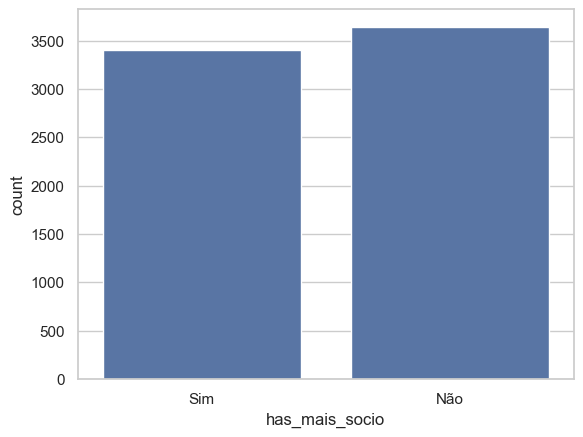


                    FREQUENCY                     

                Frequency  Frequency (normalized)
has_mais_socio                                   
Não                  3641                51.69672
Sim                  3402                48.30328

                  UNIQUE VALUES                   

['Não' 'Sim']


In [16]:
col = 'has_mais_socio'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Possui mais de um sócio</b>

É uma variável categórica nominal que indica se a empresa tem 1 ou mais sócios, não descrevendo quantos, apenas segmentando entre 1 ou mais de 1.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

A sua distribuição é bastante equilibrada, com uma leve prevalência de empresas com apenas 1 sócio.
- <b>Um sócio:</b> 83.8%
- <b>Mais de um sócio:</b> 16.2%

Essa é uma feature que parece ser importante para segmentar a variável churn porque empresas com mais sócios tendem a ser mais bem estruturadas e nosso produto ajuda bastante a esse fim.

### Funcionários

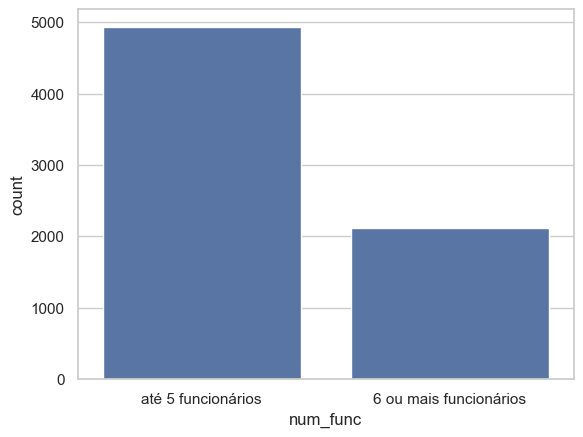


                    FREQUENCY                     

num_func
até 5 funcionários        4933
6 ou mais funcionários    2110
Name: count, dtype: int64

              FREQUENCY (NORMALIZED)              

num_func
até 5 funcionários        70.041176
6 ou mais funcionários    29.958824
Name: proportion, dtype: float64

                  UNIQUE VALUES                   

['6 ou mais funcionários' 'até 5 funcionários']


In [17]:
col = 'num_func'

freq = df_eda[col].value_counts()
freq_norm = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

plt.show()

print_separator('Frequency')
print(freq)

print_separator('Frequency (normalized)')
print(freq_norm)

print_separator('Unique Values')
print(unique_val)

---
<b>Funcionários</b>

É uma variável categórica nominal que indica o número de funcionários da empresa, não descrevendo quantos, apenas segmentando entre até 5 ou mais de 5.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

A sua distribuição é bem desequilibrada, com grande prevalência de empresas com até 5 funcionários, o que faz sentido dado que são pequenas e micro empresas.
- <b>Até 5 funcionários:</b> 83.8%
- <b>Mais de 5 funcionários:</b> 16.2%

Essa é uma feature que parece ser importante para segmentar a variável churn porque empresas com mais funcionários tendem a ser mais bem estruturadas e nosso produto ajuda bastante a esse fim.

### Meses de permanência

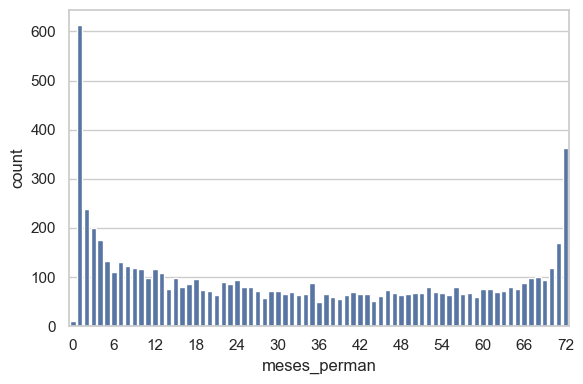


                   DISTRIBUTION                   

count                   7043
unique                     2
top       até 5 funcionários
freq                    4933
Name: num_func, dtype: object


In [18]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(data=df_eda, x='meses_perman')

# show one label every 6 months
ticks = ax.get_xticks()
ax.set_xticks(ticks[::6])

plt.tight_layout()
plt.show()

print_separator('Distribution')
print(df_eda[col].describe())

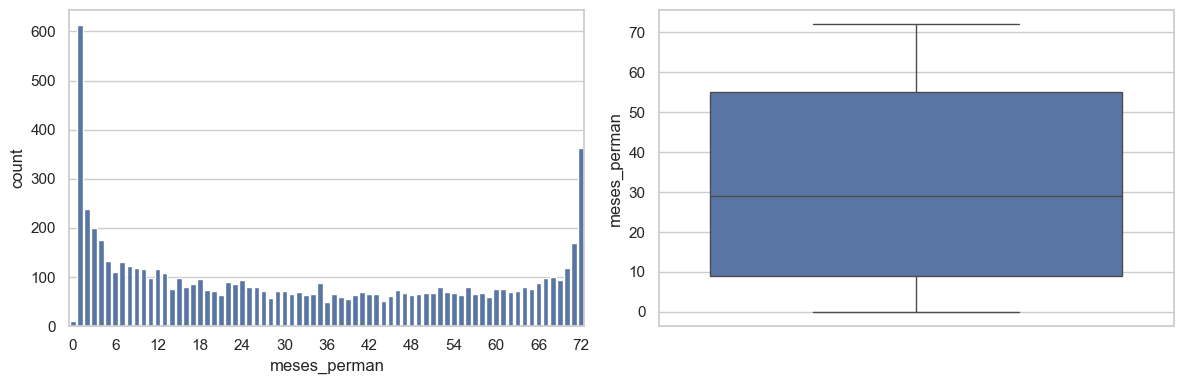


                   DISTRIBUTION                   

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: meses_perman, dtype: float64


In [19]:
col = 'meses_perman'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df_eda, x=col, ax=axes[0])
sns.boxplot(data=df_eda, y=col, ax=axes[1])

# show one label every 6 months
ticks = axes[0].get_xticks()
axes[0].set_xticks(ticks[::6])

plt.tight_layout()
plt.show()

print_separator('Distribution')
print(df_eda[col].describe())

<Axes: ylabel='meses_perman'>

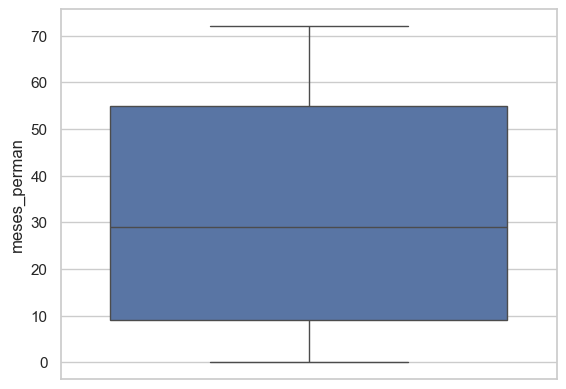

In [20]:
sns.boxplot(data=df_eda, y='meses_perman')

In [21]:
df_eda['meses_perman'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: meses_perman, dtype: float64

---
<b>Meses de permanência</b>

É uma variável numérica discreta que indica por quantos meses determinada empresa esteve ou está ativa como nosso cliente.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição se dá da seguinte maneira:
- <b>Mínimo:</b> 0 meses (clientes recém-cadastrados ou que fizeram cancelamento imediato)
- <b>Máximo:</b> 72 meses (6 anos de permanência)
- <b>Média:</b> 32.3 meses (aproximadamente 2 anos e 8 meses)
- <b>Mediana:</b> 29 meses (metade dos clientes ficou menos que 2 anos e 5 meses)
- <b>Desvio padrão:</b> 24.6 meses

O gráfico de barras mostra que existe um pequeno número de clientes com menos de 1 mês de ativação, depois há o maior pico de todos no primeiro mês (algo esperado na assinatura de um serviço online onde há grande churn inicial), seguido de uma diminuição e estabilização ao longo dos meses com outro grande pico nos 72 meses, indicando que temos alguns clientes fiéis.

Essa é uma feature muito importante, tanto para entender o churn quanto para compreender o ciclo de vida do produto. Ela pode ser segmentada em grupos como 'antigo', 'médio', 'novo' para alimentar modelos ou análises posteriores.

### Utiliza serviços financeiros

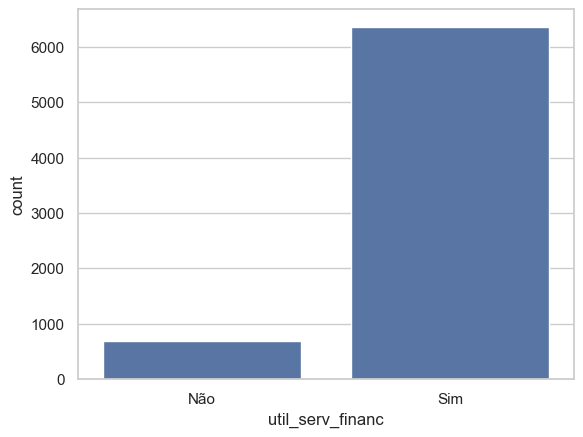


                    FREQUENCY                     

                  Frequency  Frequency (normalized)
util_serv_financ                                   
Sim                    6361               90.316626
Não                     682                9.683374

                  UNIQUE VALUES                   

['Não' 'Sim']


In [22]:
col = 'util_serv_financ'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Utiliza serviços financeiros</b>

É uma variável categórica nominal que indica se a empresa utiliza algum serviço financeiro.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição é bastante desbalanceada:
- <b>Sim:</b> 90.3 %
- <b>Não:</b> 9.7 %

Parece que essa contratação é um comportamento padrão de mercado. Talvez ela gere algum insight quando cruzada com o churn.

### Possui contador

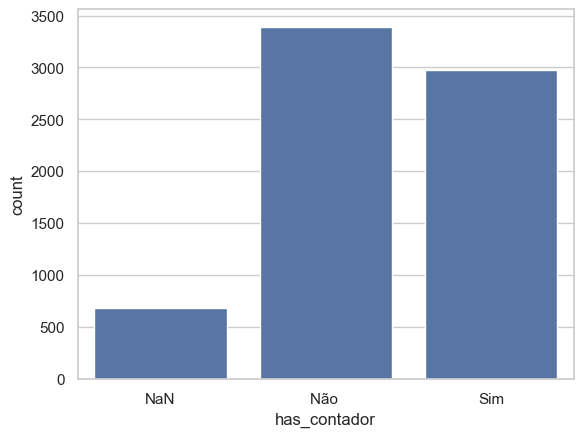


                    FREQUENCY                     

              Frequency  Frequency (normalized)
has_contador                                   
Não                3390               48.132898
Sim                2971               42.183729
NaN                 682                9.683374

                  UNIQUE VALUES                   

['NaN' 'Não ' 'Sim']


In [23]:
col = 'has_contador'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = df_eda[col].unique()

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Possui contador</b>

É uma variável categórica nominal que indica se a empresa tem ou não um contador.

Ela tem um pequeno problema formal que pode gerar erros no código, a string 'Não ' tem um espaço no final.
Além disso ela tem dados faltantes que correspondem à 9.7% do total. Isso pode ser um erro de preenchimento ou então que as empresas não tem contadores e esses dados devem ser somados aos 'Não'. Isso deve ser investigado com o time responsável.

Sua distribuição é bem balanceada:
- <b>Não:</b> 48.1 %
- <b>Sim:</b> 42.2 %
- <b>NaN:</b> 9.7 %

Essa é uma feature que pode ter relevância para o entendimento do churn, talvez empresas com contadores se preocupem mais com a parte administrativa, tendo maior aderência à nossa cartela de produtos.

### Faz conciliação bancária

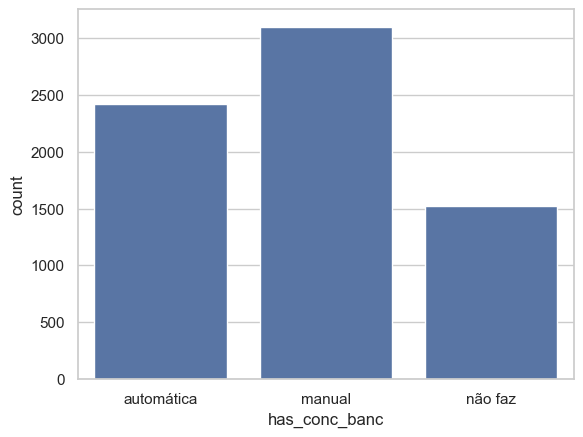


                    FREQUENCY                     

               Frequency  Frequency (normalized)
has_conc_banc                                   
manual              3096               43.958540
automática          2421               34.374556
não faz             1526               21.666903

                  UNIQUE VALUES                   

['automática' 'manual' 'não faz']


In [24]:
col = 'has_conc_banc'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Faz conciliação bancária</b>

É uma variável categórica nominal que indica se a empresa faz conciliação bancária manualmente, automáticamente ou se não realiza.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição segue da seguinte maneira:
- <b>Manual:</b> 44 %
- <b>Automática:</b> 34.4 %
- <b>Não faz:</b> 21.6 %

A maioria das empresas realiza alguma forma de conciliação bancária, com uma pequena vantagem dentres essas para a maneira manual (9.6% a mais do que a automática). Ainda assim, é bastante espressivo o número de empresas que não realizam nenhuma.

Talvez o fato de realizar ou não algum tipo de conciliação tenha impacto no churn.

### Frequência de utilização de feature do sistema: Módulo financeiro

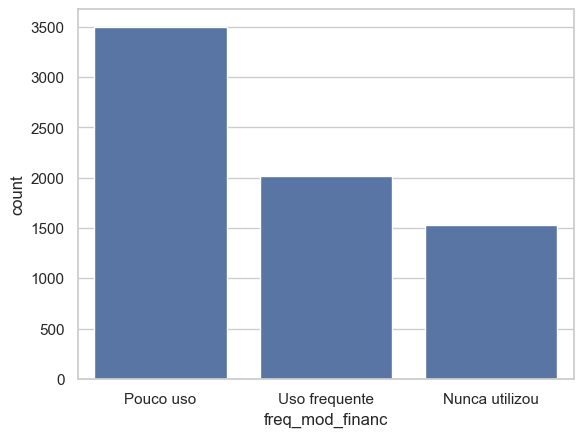


                    FREQUENCY                     

                 Frequency  Frequency (normalized)
freq_mod_financ                                   
Pouco uso             3498               49.666335
Uso frequente         2019               28.666761
Nunca utilizou        1526               21.666903

                  UNIQUE VALUES                   

['Nunca utilizou' 'Pouco uso' 'Uso frequente']


In [25]:
col = 'freq_mod_financ'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

In [26]:
print('FREQUÊNCIA RELATIVA SEGMENTADA ENTRE OS UTILIZADORES DO MÓDULO')

aux = df_eda.loc[df_eda['freq_mod_financ'] != 'Nunca utilizou']
aux['freq_mod_financ'].value_counts(normalize=True) * 100

FREQUÊNCIA RELATIVA SEGMENTADA ENTRE OS UTILIZADORES DO MÓDULO


freq_mod_financ
Pouco uso        63.404024
Uso frequente    36.595976
Name: proportion, dtype: float64

---
<b>Frequência de utilização de feature do sistema: Módulo financeiro</b>

É uma variável categórica ordinal que indica a frequência com que o cliente utiliza o módulo financeiro da nossa plataforma. A segmentação é feita por 'pouco uso', 'uso frequente' e 'nunca utilizou'.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição segue da seguinte maneira:
- <b>Pouco uso:</b> 49.7 %
- <b>Uso frequente:</b> 28.7 %
- <b>Nunca utilizou:</b> 21.6 %

78.4% dos clientes utiliza com alguma frequência esse módulo, indicando que ele é uma ferramenta relevante dentro do nosso rol. Dentro deste grupo de utilizadores, 63.4% faz pouco uso e 36.6% o utiliza com frequência, ou seja, quase o dobro destes utiliza pouco. Acredito que uma conversa com os times de negócio e produto pode render estratégias para tentar aumentarmos a frequência de uso desta ferramenta (que já tem grande aderência) e assim diminuir a possibilidade de churn.

Essa pode ser uma variável com grande correlação com o churn.


### Frequência de utilização de feature do sistema: Emissão de nota fiscal

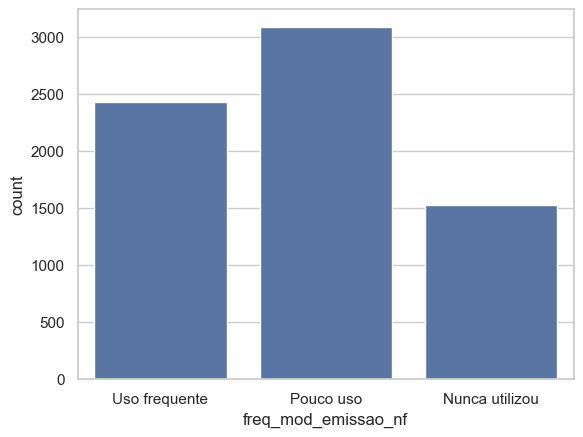


                    FREQUENCY                     

                     Frequency  Frequency (normalized)
freq_mod_emissao_nf                                   
Pouco uso                 3088               43.844952
Uso frequente             2429               34.488144
Nunca utilizou            1526               21.666903

                  UNIQUE VALUES                   

['Nunca utilizou' 'Pouco uso' 'Uso frequente']


In [27]:
col = 'freq_mod_emissao_nf'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

In [28]:
aux = df_eda.loc[df_eda['freq_mod_emissao_nf'] != 'Nunca utilizou']
aux['freq_mod_emissao_nf'].value_counts(normalize=True) * 100

freq_mod_emissao_nf
Pouco uso        55.972449
Uso frequente    44.027551
Name: proportion, dtype: float64

---
<b>Frequência de utilização de feature do sistema: Emissão de NF</b>

É uma variável categórica ordinal que indica a frequência com que o cliente utiliza o módulo financeiro da nossa plataforma. A segmentação é feita por 'pouco uso', 'uso frequente' e 'nunca utilizou'.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição segue da seguinte maneira:
- <b>Pouco uso:</b> 43.8 %
- <b>Uso frequente:</b> 34.5 %
- <b>Nunca utilizou:</b> 21.7 %

78.3% dos clientes utiliza com alguma frequência esse módulo, indicando que ele é uma ferramenta relevante dentro do nosso rol. Dentro deste grupo de utilizadores, 56% faz pouco uso e 44% o utiliza com frequência. Acredito que uma conversa com os times de negócio e produto pode render estratégias para tentar aumentarmos a frequência de uso desta ferramenta (que já tem grande aderência) e assim diminuir a possibilidade de churn.

Essa pode ser uma variável com grande correlação com o churn.

### Frequência de utilização de feature do sistema: Integração bancária

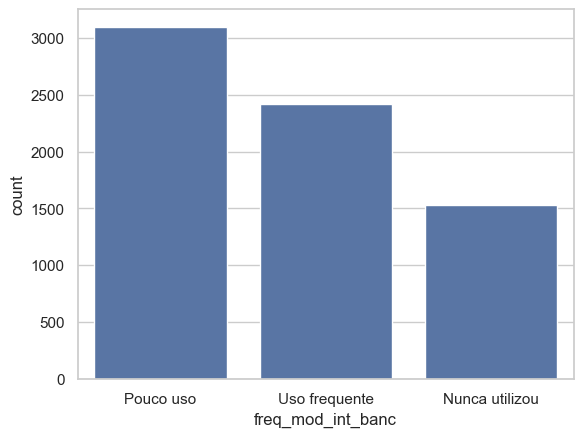


                    FREQUENCY                     

                   Frequency  Frequency (normalized)
freq_mod_int_banc                                   
Pouco uso               3095               43.944342
Uso frequente           2422               34.388755
Nunca utilizou          1526               21.666903

                  UNIQUE VALUES                   

['Nunca utilizou' 'Pouco uso' 'Uso frequente']


In [29]:
col = 'freq_mod_int_banc'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

In [30]:
aux = df_eda.loc[df_eda['freq_mod_emissao_nf'] != 'Nunca utilizou']
aux['freq_mod_emissao_nf'].value_counts(normalize=True) * 100

freq_mod_emissao_nf
Pouco uso        55.972449
Uso frequente    44.027551
Name: proportion, dtype: float64

---
<b>Frequência de utilização de feature do sistema: Integração Bancária</b>

É uma variável categórica ordinal que indica a frequência com que o cliente utiliza o módulo financeiro da nossa plataforma. A segmentação é feita por 'pouco uso', 'uso frequente' e 'nunca utilizou'.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição segue da seguinte maneira:
- <b>Pouco uso:</b> 44 %
- <b>Uso frequente:</b> 34.4 %
- <b>Nunca utilizou:</b> 21.6 %

78.4% dos clientes utiliza com alguma frequência esse módulo, indicando que ele é uma ferramenta relevante dentro do nosso rol. Dentro deste grupo de utilizadores, 56% faz pouco uso e 44% o utiliza com frequência. Acredito que uma conversa com os times de negócio e produto pode render estratégias para tentar aumentarmos a frequência de uso desta ferramenta (que já tem grande aderência) e assim diminuir a possibilidade de churn.

Essa pode ser uma variável com grande correlação com o churn.

### Frequência de utilização de feature do sistema: Módulo de vendas

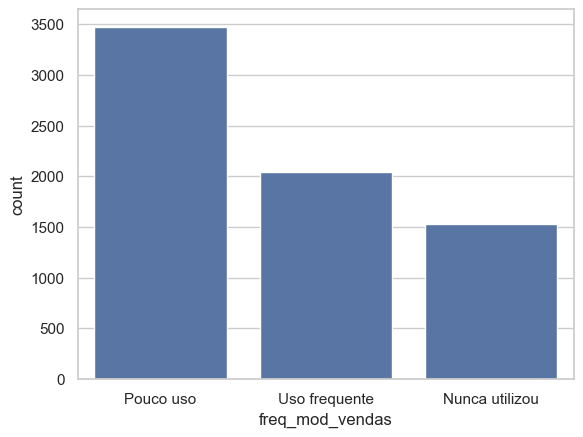


                    FREQUENCY                     

                 Frequency  Frequency (normalized)
freq_mod_vendas                                   
Pouco uso             3473               49.311373
Uso frequente         2044               29.021724
Nunca utilizou        1526               21.666903

                  UNIQUE VALUES                   

['Nunca utilizou' 'Pouco uso' 'Uso frequente']


In [31]:
col = 'freq_mod_vendas'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

In [32]:
aux = df_eda.loc[df_eda['freq_mod_emissao_nf'] != 'Nunca utilizou']
aux['freq_mod_emissao_nf'].value_counts(normalize=True) * 100

freq_mod_emissao_nf
Pouco uso        55.972449
Uso frequente    44.027551
Name: proportion, dtype: float64

---
<b>Frequência de utilização de feature do sistema: Módulo de vendas</b>

É uma variável categórica ordinal que indica a frequência com que o cliente utiliza o módulo financeiro da nossa plataforma. A segmentação é feita por 'pouco uso', 'uso frequente' e 'nunca utilizou'.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição segue da seguinte maneira:
- <b>Pouco uso:</b> 50 %
- <b>Uso frequente:</b> 29 %
- <b>Nunca utilizou:</b> 21 %

79% dos clientes utiliza com alguma frequência esse módulo, indicando que ele é uma ferramenta relevante dentro do nosso rol. Dentro deste grupo de utilizadores, 56% faz pouco uso e 44% o utiliza com frequência. Acredito que uma conversa com os times de negócio e produto pode render estratégias para tentar aumentarmos a frequência de uso desta ferramenta (que já tem grande aderência) e assim diminuir a possibilidade de churn.

Essa pode ser uma variável com grande correlação com o churn.

### Frequência de utilização de feature do sistema: Relatórios

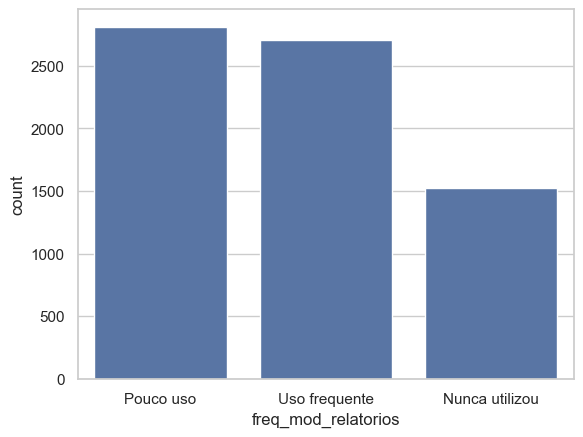


                    FREQUENCY                     

                     Frequency  Frequency (normalized)
freq_mod_relatorios                                   
Pouco uso                 2810               39.897771
Uso frequente             2707               38.435326
Nunca utilizou            1526               21.666903

                  UNIQUE VALUES                   

['Nunca utilizou' 'Pouco uso' 'Uso frequente']


In [33]:
col = 'freq_mod_relatorios'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

### Frequência de utilização de feature do sistema: Utilização de APIs de integração

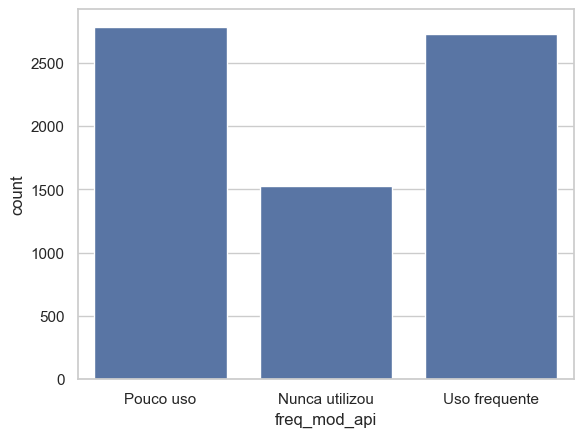


                    FREQUENCY                     

                Frequency  Frequency (normalized)
freq_mod_api                                     
Pouco uso            2785               39.542808
Uso frequente        2732               38.790288
Nunca utilizou       1526               21.666903

                  UNIQUE VALUES                   

['Nunca utilizou' 'Pouco uso' 'Uso frequente']


In [34]:
col = 'freq_mod_api'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

In [35]:
aux = df_eda.loc[df_eda['freq_mod_emissao_nf'] != 'Nunca utilizou']
aux['freq_mod_emissao_nf'].value_counts(normalize=True) * 100

freq_mod_emissao_nf
Pouco uso        55.972449
Uso frequente    44.027551
Name: proportion, dtype: float64

---
<b>Frequência de utilização de feature do sistema: Relatórios</b>

É uma variável categórica ordinal que indica a frequência com que o cliente utiliza o módulo financeiro da nossa plataforma. A segmentação é feita por 'pouco uso', 'uso frequente' e 'nunca utilizou'.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição segue da seguinte maneira:
- <b>Pouco uso:</b> 39.5 %
- <b>Uso frequente:</b> 38.8 %
- <b>Nunca utilizou:</b> 21.7 %

78.3% dos clientes utiliza com alguma frequência esse módulo, indicando que ele é uma ferramenta relevante dentro do nosso rol. Dentro deste grupo de utilizadores, 56% faz pouco uso e 44% o utiliza com frequência. Acredito que uma conversa com os times de negócio e produto pode render estratégias para tentar aumentarmos a frequência de uso desta ferramenta (que já tem grande aderência) e assim diminuir a possibilidade de churn.

Essa pode ser uma variável com grande correlação com o churn.

### Contrato

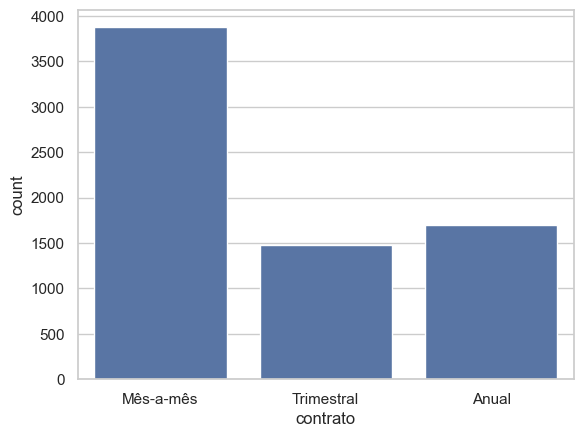


                    FREQUENCY                     

            Frequency  Frequency (normalized)
contrato                                     
Mês-a-mês        3875               55.019168
Anual            1695               24.066449
Trimestral       1473               20.914383

                  UNIQUE VALUES                   

['Anual' 'Mês-a-mês' 'Trimestral']


In [36]:
col = 'contrato'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Contrato</b>

É uma variável categórica ordinal que indica qual tipo de contrato de assinatura a empresa tem conosco.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição tem a seguinte forma:
- <b>Anual:</b> 24 %
- <b>Mês-a-mês:</b> 55 % 
- <b>Trimestral:</b> 21 %

O contrato mensal tem um número de observações maior do que a soma dos outros 2 tipos, que por sua vez são bem parecidos, com um pouco mais de prevalência de contratos anuais.
Essa é uma feature que pode ter muita relevância para o entendimento do churn, talvez a duração do contrato tenha grande correlação com a desistência.

Uma hipótese é que empresas que assinam mensalmente fazem mais churn do que as que tem um contrato por mais tempo. Um dos motivos seria que existe uma curva de aprendizado inicial para utilizar a plataforma e isso faz com que em 1 mês a empresa não consiga dominar plenamente o serviço e aí o cancelam. Outra seria que as empresas assinam por 1 mês para testar e ver se de fato se trata de uma solução eficiente para o que desejam.

### Emite boletos

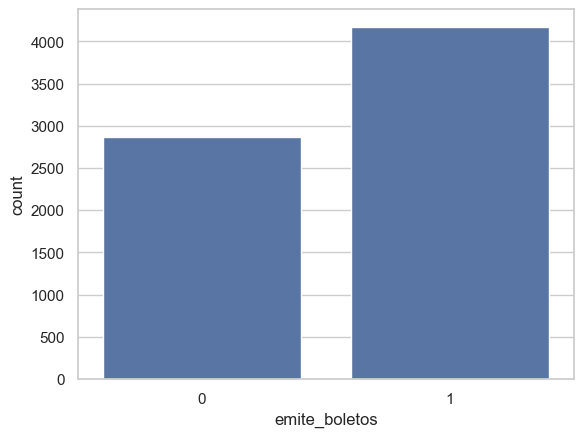


                    FREQUENCY                     

               Frequency  Frequency (normalized)
emite_boletos                                   
1                   4171               59.221922
0                   2872               40.778078

                  UNIQUE VALUES                   

[0 1]


In [37]:
col = 'emite_boletos'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Emite boletos</b>

É uma variável categórica nominal que indica se a empresa emite boletos através do nosso sistema.

Ela não apresenta nenhum problema formal e não tem dados faltantes. Cabe ressaltar que 0 corresponde à não e 1 à sim.

Sua distribuição tem a seguinte forma:
- <b>Sim:</b> 59 %
- <b>Não:</b> 41 %

O número de empresas que emite boletos é um pouco superior ao das que não emite. Ainda assim, é muito grande o volume de empresas que não emite boletos. Pode ser que essas empresas atuem em segmentos onde o boleto não é relevante.

Uma hipótese possível é que empresas que emitem boletos são mais dependentes do nosso sistema, logo, pode ter uma grande relação com o churn.

### Tipo de pagamento

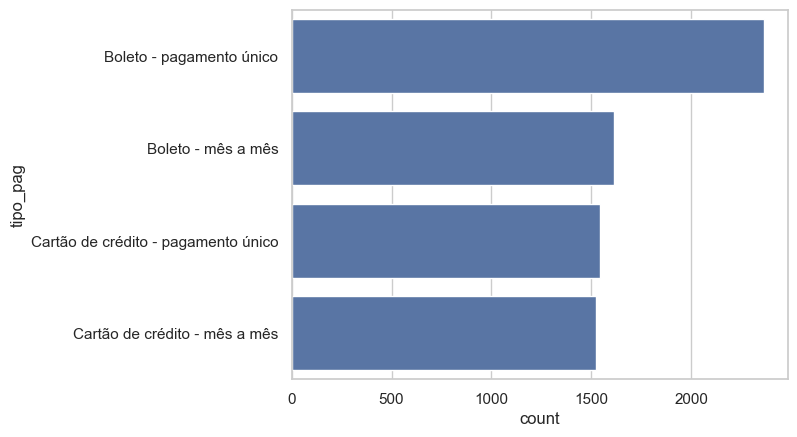


                    FREQUENCY                     

                                     Frequency  Frequency (normalized)
tipo_pag                                                              
Boleto - pagamento único                  2365               33.579441
Boleto - mês a mês                        1612               22.887974
Cartão de crédito - pagamento único       1544               21.922476
Cartão de crédito - mês a mês             1522               21.610109

                  UNIQUE VALUES                   

['Boleto - mês a mês' 'Boleto - pagamento único'
 'Cartão de crédito - mês a mês' 'Cartão de crédito - pagamento único']


In [38]:
col = 'tipo_pag'

freq = df[col].value_counts()
freq_nom = df[col].value_counts(normalize=True) * 100
unique_val = np.sort(df[col].unique())

sns.countplot(data=df, y=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Tipo de pagamento</b>

É uma variável categórica nominal que indica o método que os clientes utilizam para o pagamento do nosso serviço.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição tem a seguinte forma:
- <b>Boleto - pagamento único:</b> 33.6 %
- <b>Boleto - mês a mês:</b> 22.9 %
- <b>Cartão de crédito - pagamento único:</b> 21.9 %
- <b>Cartão de crédito - mês a mês:</b> 21.6 %

Todas as formas de pagamento tem aderência parecida com uma maior quantidade de clientes escolhendo o boleto de pagamento único. O método de pagamento pode ser um indicativo de taxa de retenção, além de poder se relacionar com inadimplência e renovação, impactando diretamente o churn.

### Receita mensal

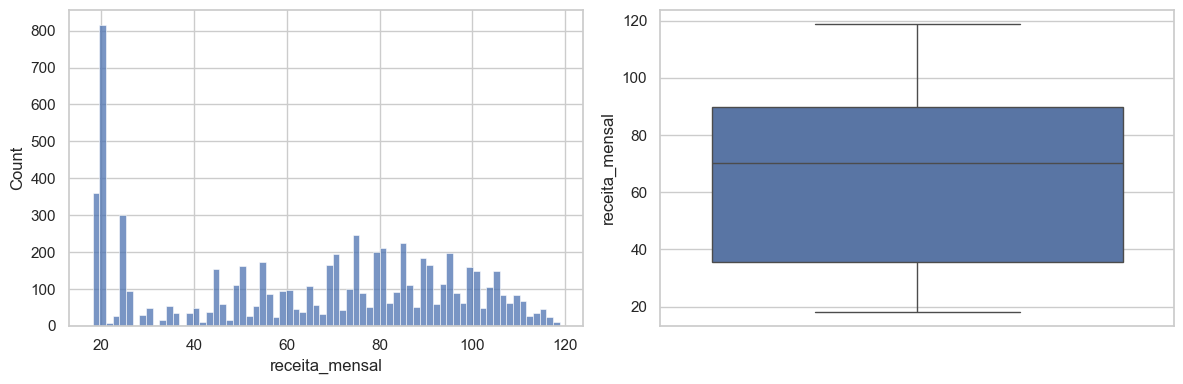


                   DISTRIBUTION                   

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: receita_mensal, dtype: float64


In [39]:
col = 'receita_mensal'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df_eda, x=col, bins=70, ax=axes[0])
sns.boxplot(data=df_eda, y=col, ax=axes[1])

plt.tight_layout()
plt.show()

print_separator('Distribution')
print(df_eda[col].describe())

---
<b>Receita mensal</b>

É uma variável numérica contínua que indica o volume de receita mensal gerado pelos clientes.

Ela não apresenta nenhum problema formal e não tem dados faltantes.

Sua distribuição se dá da seguinte maneira:
- <b>Mínimo:</b> R\$: 18,25
- <b>Máximo:</b> R\$: 118,75
- <b>Média:</b> R\$: 64,76
- <b>Mediana:</b> R\$: 70,35
- <b>Desvio padrão:</b> R\$: 30,09

O histograma mostra uma distribuição multimodal vários picos que parecem ser referentes aos tipo de plano que oferecemos e à segmentação de clientes. Podemos ver que dentre esses planos existe uma clara maior aderência dos mais baratos, entre 20 e 35 reais.

O boxplot confirma uma leve assimetria à esquerda, puxada por esses picos de valores menores, o que justifica a média (64) ser um pouco menor do que a mediana(70).

50% dos clientes consomem aos planos entre 35 e 90 reais, faixa de valor da média e mediana, o que mostra que esse é o core do nosso produto. Não há nenhum outlier.

Essa é uma variável importante para entendermos o churn porque representa a segmentação de produtos e clientes.

### Receita total

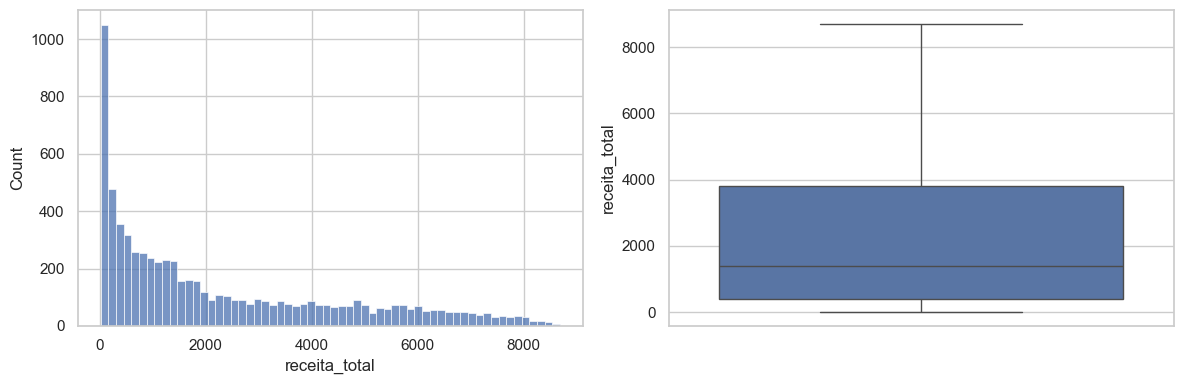


                   DISTRIBUTION                   

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: receita_total, dtype: float64


In [40]:
col = 'receita_total'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df_eda, x=col, bins=60, ax=axes[0])
sns.boxplot(data=df_eda, y=col, ax=axes[1])

plt.tight_layout()
plt.show()

print_separator('Distribution')
print(df_eda[col].describe())

---
<b>Receita total</b>

É uma variável numérica contínua que indica a receita total gerada pelo cliente até a data de fechamento do dataset.

Ela apresenta nenhum problema formal mas tem 11 dados faltantes que deverão ser tratados mais à frente.

Sua distribuição se dá da seguinte maneira:
- <b>Mínimo:</b> R\$: 18,8
- <b>Máximo:</b> R\$: 8684,8
- <b>Média:</b> R\$: 2283,3
- <b>Mediana:</b> R\$: 1397,5
- <b>Desvio padrão:</b> R\$: 2266,8

O histograma mostra uma distribuição assimétrica à direita com um grande pico nos menores valores que parecem ser referentes aos clientes que estão há poucos meses utilizando nossos serviços. Esse pico fica explícito no fato da mediana (1397,5) ser quase metade da média(2283,3).

O desvio padrão é bastante grande, praticamente igual à média, o que faz sentido dado que existem clientes com poucos meses de assinatura e outros com muitos, além do fato de termos produtos em diferentes prateleiras de precificação.

O boxplot confirma a expressiva assimetria à direita e mostra que nosso intervalo interquartil compreende valores entre R\$: 401 e R\$: 3794, expondo que apesar de não termos outliers aparentes segundo os critério IQR, ainda assim o range da nossa base é bastante grande, dado que os valores máximo e mínimos são R\$: 8684 e R\$: 18 (respectivamente) e suaa cauda bastante longa à direita.

Essa é uma variável importante para entendermos o churn porque nos ajuda a entender o ciclo do produto e clientes com menores valores nessa feature podem ter maiores chances de churn.

### Mês churn

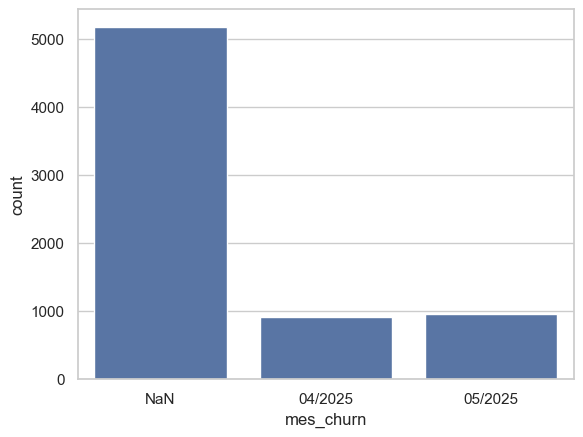


                    FREQUENCY                     

           Frequency  Frequency (normalized)
mes_churn                                   
NaN             5174               73.463013
05/2025          958               13.602158
04/2025          911               12.934829

                  UNIQUE VALUES                   

['04/2025' '05/2025' 'NaN']


In [41]:
col = 'mes_churn'

freq = df_eda[col].value_counts()
freq_nom = df_eda[col].value_counts(normalize=True) * 100
unique_val = np.sort(df_eda[col].unique())

sns.countplot(data=df_eda, x=col)

aux = pd.DataFrame({
    'Frequency': freq,
    'Frequency (normalized)': freq_nom
})

plt.show()

print_separator('Frequency')
print(aux)

print_separator('Unique Values')
print(unique_val)

---
<b>Mês churn</b>

É uma variável categórica ordinal que indica o mês em que o churn ocorreu.

Ela não apresenta nenhum problema formal e 73% dos são faltantes na verdade são informativos e indicam que estes clientes não fizeram churn.

Sua distribuição segue da seguinte maneira:
- <b>Faltantes:</b> 73.5 %
- <b>05/2025:</b> 12.9 %
- <b>04/2025:</b> 13.6 %

A maioria das empresas realiza alguma forma de conciliação bancária, com uma pequena vantagem dentres essas para a maneira manual (9.6% a mais do que a automática). Ainda assim, é bastante espressivo o número de empresas que não realizam nenhuma.

Talvez o fato de realizar ou não algum tipo de conciliação tenha impacto no churn.

## Bivariated Analysis

### Churn X Tipo de empresa

<Axes: xlabel='tipo_empresa', ylabel='count'>

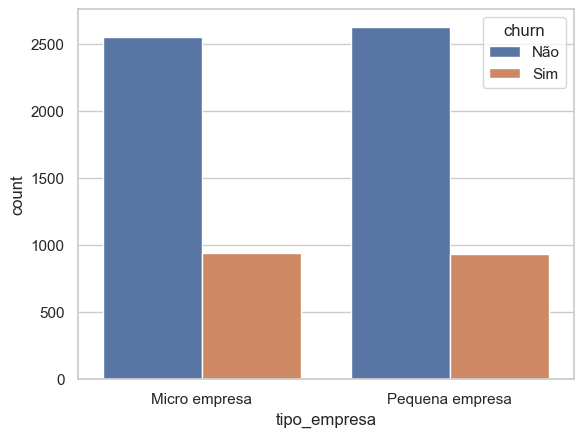

In [42]:
sns.countplot(data=df_eda, hue='churn', x='tipo_empresa')

---
O gráfico de barras mostra que, isoladamente, a feature 'tipo da empresa' aparentemente não tem correlação com o churn. Isso não quer dizer que ela seja irrelevante, podemos no futuro testar se ela em conjunção com outras variáveis é capaz de gerar uma informação relevante quanto ao churn. Isso pode ser feito através de algoritmos de árvores e regressões ou por ferramentas como o Boruta.

<b>Hipótese rejeitada: </b>Empresas de menor porte tendem a apresentar maior churn quando comparadas a empresas mais estruturadas.

### Churn X Fundação da empresa

<Axes: xlabel='count', ylabel='fund_empresa'>

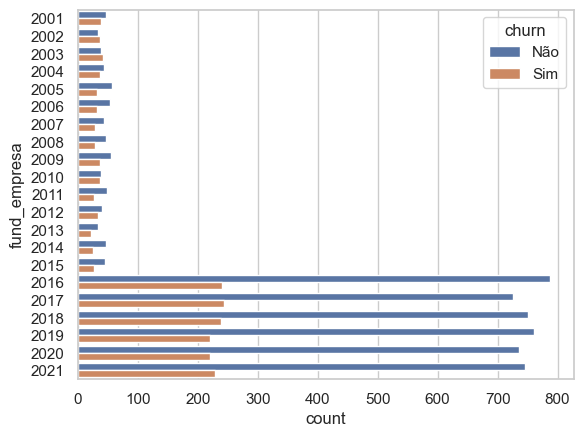

In [43]:
sns.countplot(data=df_eda, hue='churn', y='fund_empresa')

In [44]:
# Tabela de contingência
pd.crosstab(
    df_eda['fund_empresa'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
fund_empresa,,
2001,55.3,44.7
2002,48.6,51.4
2003,48.1,51.9
2004,55.0,45.0
2005,64.4,35.6
2006,62.4,37.6
2007,60.6,39.4
2008,62.2,37.8
2009,60.4,39.6


In [45]:
df['fund_empresa'].value_counts().sort_index()

fund_empresa
2001      85
2002      70
2003      79
2004      80
2005      87
2006      85
2007      71
2008      74
2009      91
2010      74
2011      75
2012      73
2013      55
2014      71
2015      72
2016    1029
2017     969
2018     990
2019     982
2020     956
2021     975
Name: count, dtype: int64

In [46]:
# Criando a coluna da idade da empresa
df_eda['idade_empresa'] = 2021 - df_eda['fund_empresa']

In [47]:
# Dividindo em faixas a idade da empresa e criando uma coluna
df_eda['grupo_idade_empresa'] = pd.cut(
    df_eda['idade_empresa'],
    bins=[0, 5, 20]
)

In [48]:
# Tabela de contingência do agrupamento por idade
aux = pd.crosstab(
    df_eda['grupo_idade_empresa'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

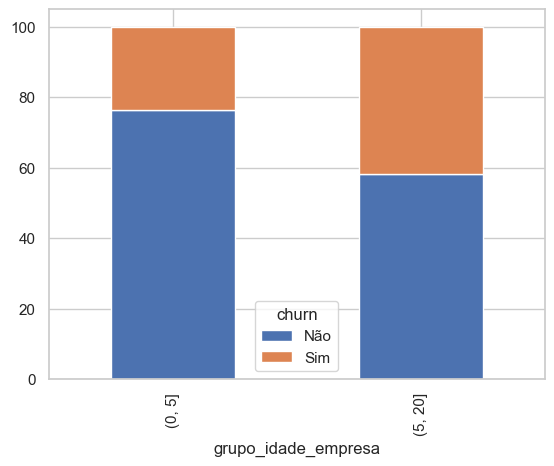

In [49]:
aux.plot(kind='bar', stacked=True)
plt.show()

In [50]:
# Calculando o tamanho e as frequências para cada faixa etária da empresa

qtd_ate_5 = (df_eda['idade_empresa'] <= 5).sum()
pct_ate_5 = ((df_eda['idade_empresa'] <= 5).sum() / df_eda.shape[0]) * 100

qtd_mais_5 = (df_eda['idade_empresa'] > 5).sum()
pct_mais_5 = ((df_eda['idade_empresa'] > 5).sum() / df_eda.shape[0]) * 100

print(f"Empresas com até 5 anos:")
print(f"{qtd_ate_5} / {pct_ate_5:.1f} % da base")
print('')
print(f"Empresas com mais de 5 anos:")
print(f"{qtd_mais_5} / {pct_mais_5:.1f} % da base")

Empresas com até 5 anos:
5901 / 83.8 % da base

Empresas com mais de 5 anos:
1142 / 16.2 % da base


---
Apesar da variável churn ser bastante desbalanceada (73.5% não fez churn / 26.5% fez churn), quando analisamos a frequência relativa para cada idade de empresa, vemos que o churn se comporta de maneira diferente, principalmente entre empresas com até 5 anos e empresas mais antigas.

Esse insight deve ser analisado com cuidado porque o número de observações com mais de 5 anos de idade corresponde a apenas 16.2% da base, embora o volume ainda seja suficiente para indicar uma diferença relevante. Nesse recorte, a taxa de churn de empresas mais antigas é aproximadamente 1.77 vezes maior do que a de empresas mais jovens.

Fazendo um recorte mais específico, 50% das empresas fundadas entre 2001 e 2004 (as mais antigas da base) fizeram churn, comportamento que foge muito ao padrão dos outros anos e que deverá ser investigado em outro momento para entendermos melhor o porque desse comportamento.

Concluímos que a idade da empresa tem associação com o churn.

<b>Hipóteses</b>:
- Empresas mais antigas migraram para a concorrência.
- Versões anteriores do produto podem não ter oferecido funcionalidades ou aderência suficientes.

<b>Propostas:</b>
- Cabe investigar se essas empresas antigas ainda existem e, caso constatemos que sim, podemos realizar uma campanha promocional agressiva para reativá-los. Considerando que o churn pode ter ocorrido por limitações de versões anteriores do produto ou maior competitividade do mercado à época, recomenda-se uma comunicação que destaque a evolução das principais funcionalidades e ofereça condições comerciais diferenciadas.

### Churn X Possui mais de um sócio

<Axes: xlabel='has_mais_socio', ylabel='count'>

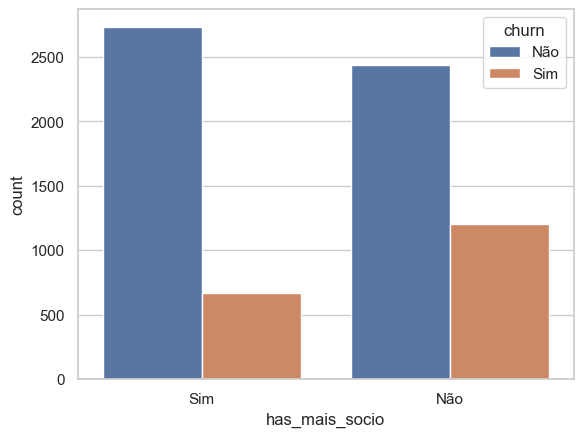

In [51]:
sns.countplot(data=df_eda, x='has_mais_socio', hue='churn')

In [52]:
contingency_table_pct = pd.crosstab(
    df_eda['has_mais_socio'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

contingency_table_pct

churn,Não,Sim
has_mais_socio,,
Não,67.0,33.0
Sim,80.3,19.7


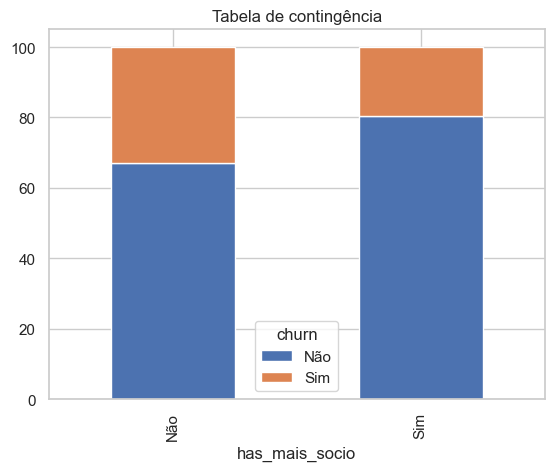

In [53]:
contingency_table_pct.plot(kind='bar', stacked=True)
plt.title('Tabela de contingência')
plt.show()

---
A análise mostra que empresas com apenas um sócio churnam 1.7x mais.

Esse resultado sugere que o número de sócios pode estar relacionado à retenção, possivelmente refletindo maior estrutura organizacional ou maior capacidade financeira.

<b>Hipótese confirmada: </b>Empresas com menor número de sócios apresentam maior risco de churn.

### Churn X Funcionários

<Axes: xlabel='num_func', ylabel='count'>

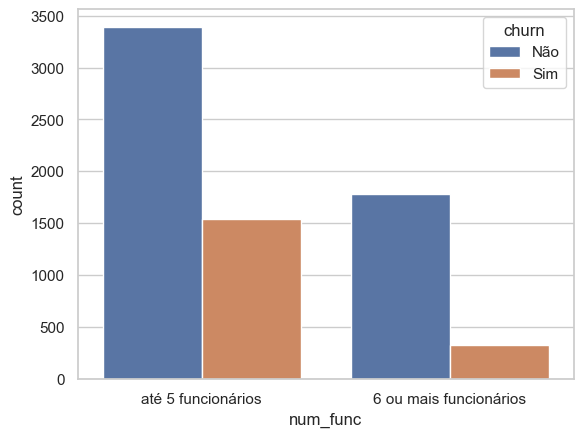

In [54]:
sns.countplot(data=df_eda, x='num_func', hue='churn')

In [55]:
pd.crosstab(
    df_eda['num_func'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
num_func,,
6 ou mais funcionários,84.5,15.5
até 5 funcionários,68.7,31.3


---
A análise mostra que empresas com mais de 5 funcionários churnam 2x menos.

Esse resultado sugere que o número de funcionários pode estar relacionado à retenção, possivelmente refletindo a maior capacidade financeira ou necessidade de estrutura organizacional.

<b>Hipótese confirmada: </b>Empresas com menor número de funcionários apresentam maior risco de churn.

### Churn X Meses de permanência

In [56]:
df_eda.groupby('churn')['meses_perman'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
Não,5174.0,37.6,24.1,0.0,15.0,38.0,61.0,72.0
Sim,1869.0,18.0,19.5,1.0,2.0,10.0,29.0,72.0


<Axes: xlabel='meses_perman'>

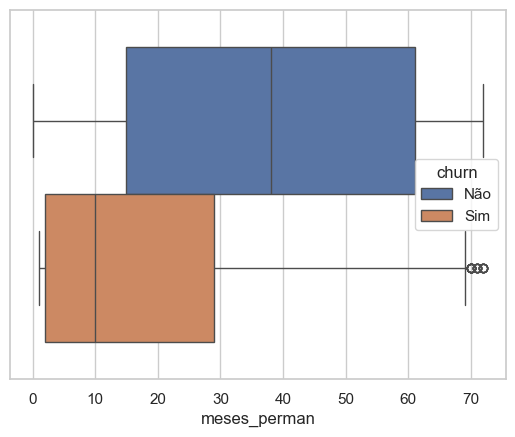

In [57]:
sns.boxplot(data=df_eda, x='meses_perman', hue='churn')

<Axes: xlabel='meses_perman', ylabel='Density'>

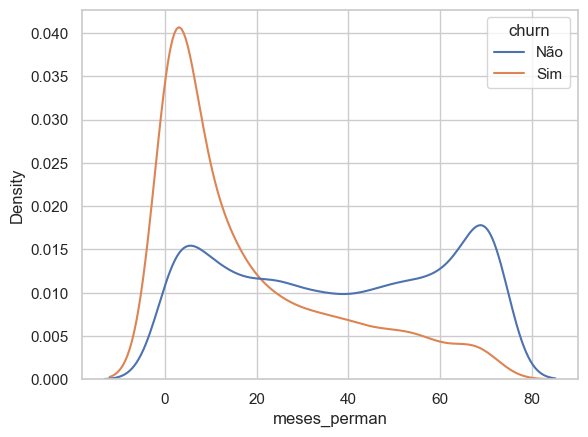

In [58]:
# Curva de densidade
sns.kdeplot(
    data=df,
    x='meses_perman',
    hue='churn',
    common_norm=False # As curvas não compartilham a mesma normalização
)

---
Podemos analisar que empresas com poucos meses de permanência churnam muito mais do que empresas com mais tempo. Após o período inicial, vê-se que clientes com maior tempo de permanência apresentam menor propensão ao churn. Ou seja, existe uma relação monótona decrescente.

Essa é uma feature com uma importante associação com o churn.

<b>Hipótese confirmada:</b> Empresas nos primeiros meses de contrato apresentam maior taxa de churn.

### Churn X Utiliza serviços financeiros

<Axes: xlabel='util_serv_financ', ylabel='count'>

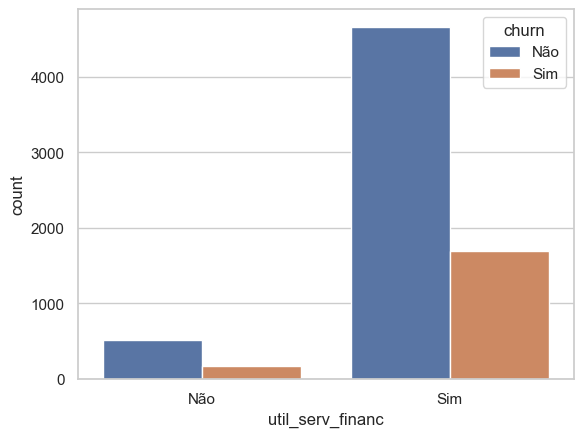

In [59]:
sns.countplot(data=df_eda, x='util_serv_financ', hue='churn')

In [60]:
pd.crosstab(
    df_eda['util_serv_financ'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
util_serv_financ,,
Não,75.1,24.9
Sim,73.3,26.7


---
Podemos analisar que há uma associação fraca entre o churn e a utilização de serviços financeiros, dado que as taxas entre as empresas que utilizam e não utilizam esses serviços tem diferença marginal.

### Churn X Possui contador

<Axes: xlabel='has_contador', ylabel='count'>

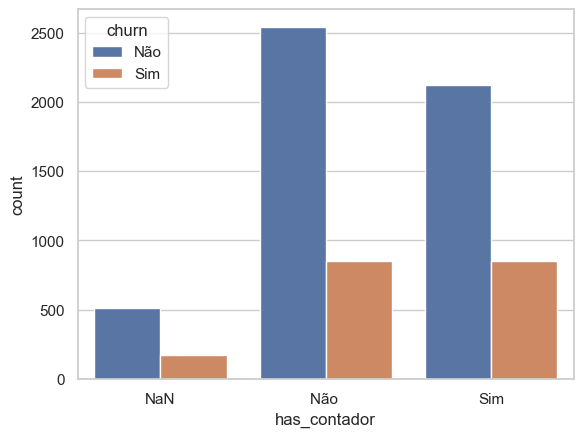

In [61]:
sns.countplot(data=df_eda, x='has_contador', hue='churn')

In [62]:
pd.crosstab(
    df_eda['has_contador'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
has_contador,,
NaN,75.1,24.9
Não,75.0,25.0
Sim,71.4,28.6


---
Podemos analisar que há uma associação fraca entre o churn e a presença de contadores nas empresas, dado que as taxas entre as empresas que utilizam e não utilizam esses serviços tem diferença marginal. Cabe ressaltar que o grupo de valores ausentes apresenta praticamente a mesma taxa de churn que o grupo que não possui contadores, sugerindo que esses dados faltantes possívelmente são referentes as empresas que não têm contadores.

### Churn X Faz conciliação bancária

<Axes: xlabel='has_conc_banc', ylabel='count'>

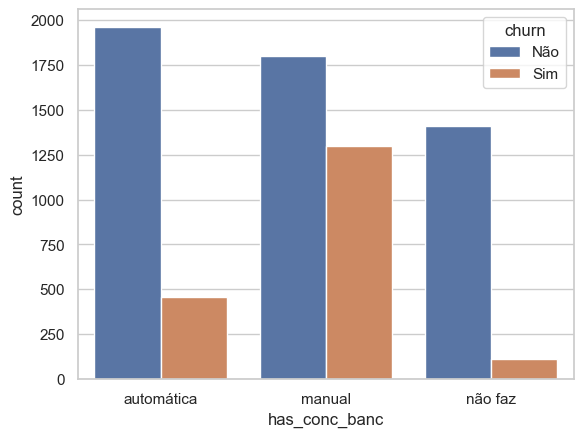

In [63]:
sns.countplot(data=df_eda, x='has_conc_banc', hue='churn')

In [64]:
pd.crosstab(
    df_eda['has_conc_banc'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
has_conc_banc,,
automática,81.0,19.0
manual,58.1,41.9
não faz,92.6,7.4


---
Os dados sugerem uma associação forte entre o churn e a maneira que a conciliação bancária é realizada, dado que as taxas de churn se distribuem de maneira bem diferente entre os grupos.

As empresas que fazem conciliação manual correspondem a 44% da base e têm uma taxa de churn alta (41.9%), o que explicita um alto risco. As empresas que fazem conciliação automática tem uma taxa moderada (19%). As que não fazem conciliação tem uma taxa baixa (7.4%).

Esse padrão sugere que empresas em diferentes estágios operacionais podem estar associados a diferentes riscos de churn. 

### Churn X Frequência de utilização de feature do sistema: Módulo financeiro

<Axes: xlabel='freq_mod_financ', ylabel='count'>

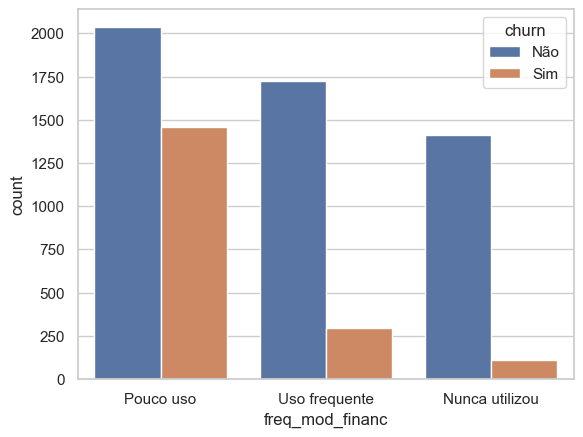

In [65]:
sns.countplot(data=df_eda, x='freq_mod_financ', hue='churn')

In [66]:
pd.crosstab(
    df_eda['freq_mod_financ'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
freq_mod_financ,,
Nunca utilizou,92.6,7.4
Pouco uso,58.2,41.8
Uso frequente,85.4,14.6


---
Os dados sugerem uma associação forte entre o churn e a frequência de uso do módulo financeiro, dado que as taxas de churn se distribuem de maneira bem diferente entre os grupos.

As empresas que fazem pouco uso correspondem a 49.6% da base e têm uma taxa de churn alta (41.8%), o que explicita um alto risco. As empresas que fazem uso frequente tem uma taxa moderada-baixa (14.6%). As que nunca utilizaram tem uma taxa baixa (7.4%).

Esse padrão sugere que empresas com diferentes aderências a essa funcionalidade podem estar associadas a diferentes riscos de churn. 

### Churn X Frequência de utilização de feature do sistema: Emissão de nota fiscal

<Axes: xlabel='freq_mod_emissao_nf', ylabel='count'>

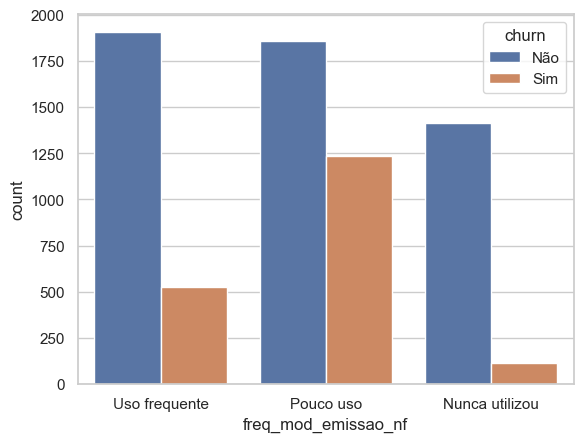

In [67]:
sns.countplot(data=df_eda, x='freq_mod_emissao_nf', hue='churn')

In [68]:
pd.crosstab(
    df_eda['freq_mod_emissao_nf'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
freq_mod_emissao_nf,,
Nunca utilizou,92.6,7.4
Pouco uso,60.1,39.9
Uso frequente,78.5,21.5


---
Os dados sugerem uma associação forte entre o churn e a frequência de uso da ferramenta de emissão de notas fiscais, dado que as taxas de churn se distribuem de maneira diferente entre os grupos.

As empresas que fazem pouco uso correspondem a 43.8% da base e têm uma taxa de churn alta (39.9%), o que explicita um alto risco. As empresas que fazem uso frequente tem uma taxa significantemente menor (21.5%). As que nunca utilizaram tem uma taxa baixa (7.4%).

Esse padrão sugere que empresas com diferentes níveis de aderências a essa funcionalidade podem estar associadas a diferentes riscos de churn. 

### Churn X Frequência de utilização de feature do sistema: Integração bancária

<Axes: xlabel='freq_mod_int_banc', ylabel='count'>

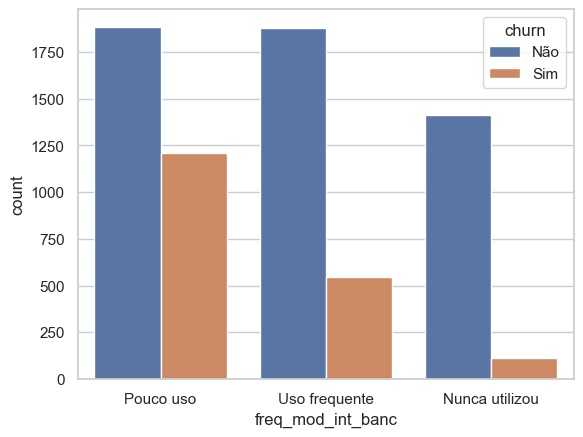

In [69]:
sns.countplot(data=df_eda, x='freq_mod_int_banc', hue='churn')

In [70]:
pd.crosstab(
    df_eda['freq_mod_int_banc'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
freq_mod_int_banc,,
Nunca utilizou,92.6,7.4
Pouco uso,60.9,39.1
Uso frequente,77.5,22.5


---
Os dados sugerem uma associação forte entre o churn e a frequência de uso da ferramenta de integração bancária, dado que as taxas de churn se distribuem de maneira diferente entre os grupos.

As empresas que fazem pouco uso correspondem a 43.9% da base e têm uma taxa de churn alta (39.1%), o que explicita um alto risco. As empresas que fazem uso frequente tem uma taxa significantemente menor (22.5%). As que nunca utilizaram tem uma taxa baixa (7.4%).

Esse padrão sugere que empresas com diferentes níveis de aderências a essa funcionalidade podem estar associadas a diferentes riscos de churn. 

### Churn X Frequência de utilização de feature do sistema: Módulo de vendas

<Axes: xlabel='freq_mod_vendas', ylabel='count'>

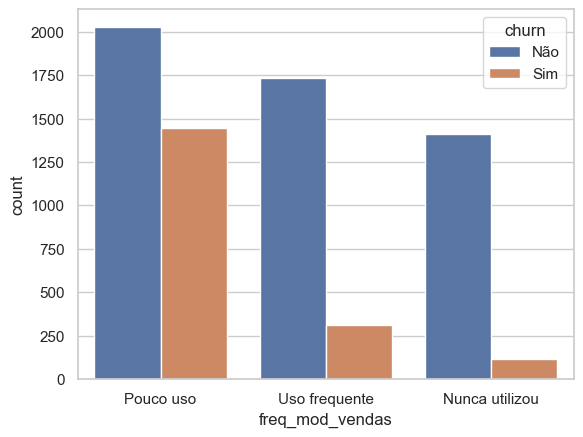

In [71]:
sns.countplot(data=df_eda, x='freq_mod_vendas', hue='churn')

In [72]:
pd.crosstab(
    df_eda['freq_mod_vendas'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
freq_mod_vendas,,
Nunca utilizou,92.6,7.4
Pouco uso,58.4,41.6
Uso frequente,84.8,15.2


---
Os dados sugerem uma associação forte entre o churn e a frequência de uso da ferramenta de integração bancária, dado que as taxas de churn se distribuem de maneira diferente entre os grupos.

As empresas que fazem pouco uso correspondem a 49.3% da base e têm uma taxa de churn alta (41.6%), o que explicita um alto risco. As empresas que fazem uso frequente tem uma taxa significantemente menor (22.5%). As que nunca utilizaram tem uma taxa baixa (7.4%).

Esse padrão sugere que empresas com diferentes níveis de aderências a essa funcionalidade podem estar associadas a diferentes riscos de churn. 

### Churn X Frequência de utilização de feature do sistema: Relatórios

<Axes: xlabel='freq_mod_relatorios', ylabel='count'>

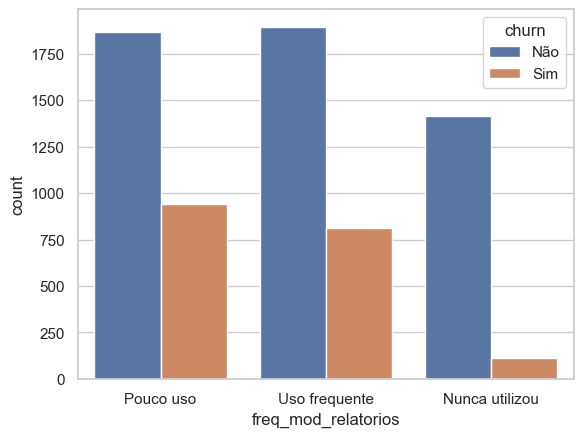

In [73]:
sns.countplot(data=df_eda, x='freq_mod_relatorios', hue='churn')

In [74]:
pd.crosstab(
    df_eda['freq_mod_relatorios'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
freq_mod_relatorios,,
Nunca utilizou,92.6,7.4
Pouco uso,66.5,33.5
Uso frequente,69.9,30.1


---
Os dados sugerem uma associação mais fraca entre o churn e a frequência de uso da ferramenta de integração bancária quando comparada às análises de outros módulos.

Observa-se uma diferença relevante entre empresas que nunca utilizaram a funcionalidade e aquelas que a utilizaram em qualquer frequência, enquanto as taxas de churn entre empresas que fazem pouco uso (33.5%) e uso frequente (30.1%) são bastante próximas.

Diferentemente de outros módulos analisados, a distribuição da base entre pouco uso (39.4%) e uso frequente (38.4%) é equilibrada, sugerindo que essa funcionalidade apresenta um padrão de utilização mais homogêneo entre os usuários. As empresas que nunca utilizaram a ferramenta mantêm uma taxa de churn baixa (7.4%).

Esse padrão indica que o uso da funcionalidade, por si só, não discrimina bem diferentes níveis de risco de churn, sendo mais informativo distinguir entre uso e não uso do que entre intensidades de uso.

### Churn X Frequência de utilização de feature do sistema: Utilização de APIs de integração

<Axes: xlabel='freq_mod_api', ylabel='count'>

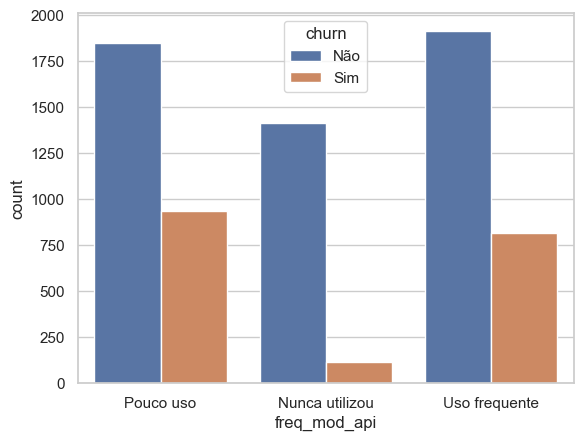

In [75]:
sns.countplot(data=df_eda, x='freq_mod_api', hue='churn')

In [76]:
pd.crosstab(
    df_eda['freq_mod_api'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

churn,Não,Sim
freq_mod_api,,
Nunca utilizou,92.6,7.4
Pouco uso,66.3,33.7
Uso frequente,70.1,29.9


---
Os dados sugerem uma associação mais fraca entre o churn e a frequência de uso da ferramenta de integração por API.

Observa-se uma diferença relevante entre empresas que nunca utilizaram a funcionalidade e aquelas que a utilizaram em qualquer frequência, enquanto as taxas de churn entre empresas que fazem pouco uso (33.7%) e uso frequente (29.9%) são próximas.

Diferentemente de outros módulos analisados, a distribuição da base entre pouco uso (39.5%) e uso frequente (38.8%) é equilibrada, sugerindo que essa funcionalidade apresenta um padrão de utilização mais homogêneo entre os usuários. As empresas que nunca utilizaram a ferramenta mantêm uma taxa de churn baixa (7.4%).

Esse padrão indica que o uso da funcionalidade, por si só, não discrimina bem diferentes níveis de risco de churn, sendo mais informativo distinguir entre uso e não uso do que entre intensidades de uso.

### Análise transversal das features relativas à frequência de uso das ferramentas

Agora aparece claramente um padrão transversal entre as features:
- Pouco uso → churn mais alto
- Uso frequente → churn menor
- Nunca usou → churn baixo

Isso sugere fortemente:
- Fricção no processo de adoção
- Estado intermediário como ponto crítico
- Features avançadas funcionando como proxy de maturidade e engajamento

### Churn X Contrato

<Axes: xlabel='contrato', ylabel='count'>

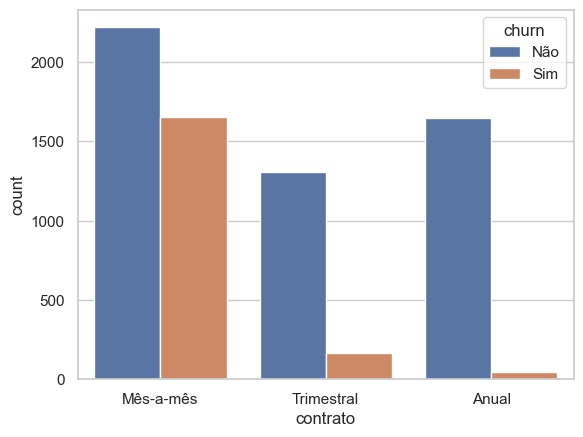

In [77]:
sns.countplot(data=df_eda, x='contrato', hue='churn')

In [78]:
aux = pd.crosstab(
    df_eda['contrato'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

aux

churn,Não,Sim
contrato,,
Anual,97.2,2.8
Mês-a-mês,57.3,42.7
Trimestral,88.7,11.3


---
Os dados sugerem uma associação forte entre o churn e o tipo de contrato, dado que as taxas se distribuem de forma distinta entre categorias.

Observa-se uma diferença expressiva na taxa de churn entre quem faz contrato com renovação de mês-a-mês (42.7%) e os demais grupos. As taxas de churn do trimestral são bem menores (11.3%) e as do anual mínimas (2.8%). Além disso, os contratos mês-a-mês correspondem a 55% da base, concentrando risco elevado.

Essa padrão indica que essa feature possui alto poder descritivo em relação ao risco de churn.

<b>Hipótese confirmada:</b> Empresas com assinaturas mês-a-mês apresentam mais churn do que as trimestrais e anuais.

### Churn X Emite boletos

<Axes: xlabel='emite_boletos', ylabel='count'>

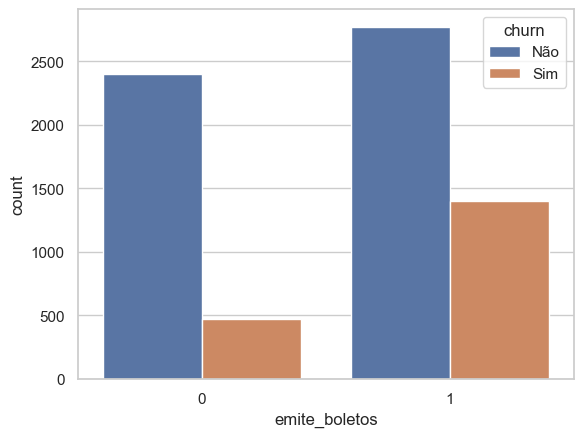

In [79]:
sns.countplot(data=df_eda, x='emite_boletos', hue='churn')

In [80]:
aux = pd.crosstab(
    df_eda['emite_boletos'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

aux

churn,Não,Sim
emite_boletos,,
0,83.7,16.3
1,66.4,33.6


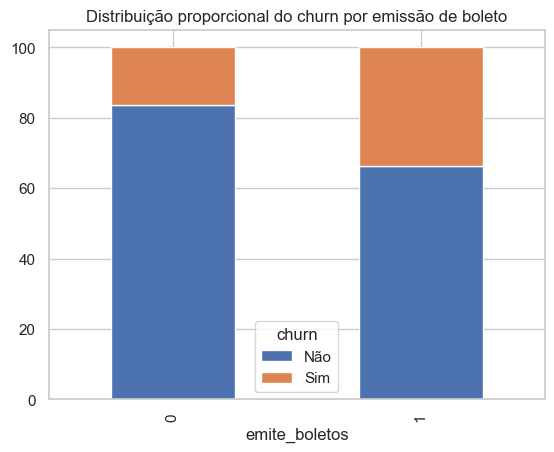

In [81]:
aux.plot(kind='bar', stacked=True)

plt.title('Distribuição proporcional do churn por emissão de boleto')
plt.show()

---
Os dados sugerem uma associação moderada-forte entre o churn e a emissão de boletos, dado que as taxas se distribuem de forma distinta entre categorias.

Observa-se uma diferença expressiva entre quem emite boleto (33.6%) e quem não emite (16.3%), ou seja, a taxa de churn é 2x maior no primeiro grupo.

Essa padrão indica que essa feature possui poder descriminativo em relação ao risco de churn.

### Churn X Tipo de pagamento

<Axes: xlabel='count', ylabel='tipo_pag'>

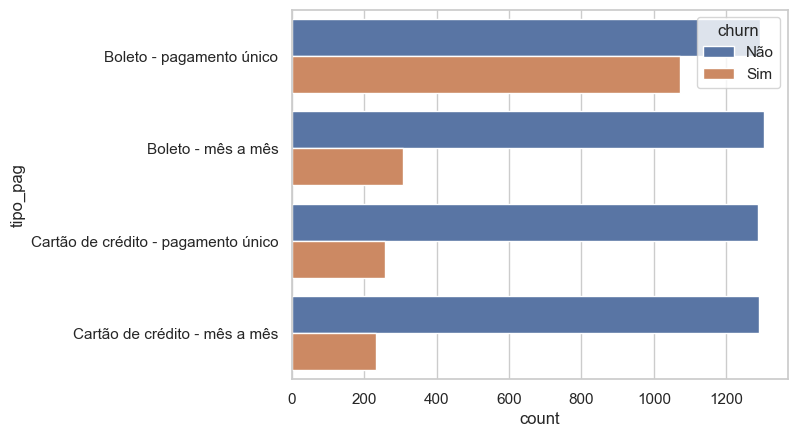

In [82]:
sns.countplot(data=df_eda, y='tipo_pag', hue='churn')

In [83]:
aux = pd.crosstab(
    df_eda['tipo_pag'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

aux

churn,Não,Sim
tipo_pag,,
Boleto - mês a mês,80.9,19.1
Boleto - pagamento único,54.7,45.3
Cartão de crédito - mês a mês,84.8,15.2
Cartão de crédito - pagamento único,83.3,16.7


Text(0.5, 1.0, 'Distribuição proporcional do churn por tipo de pagamento')

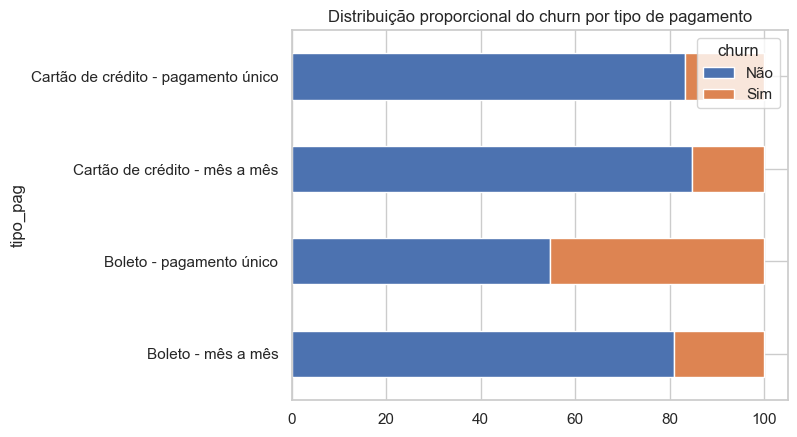

In [84]:
aux.plot(kind='barh', stacked=True)

plt.title('Distribuição proporcional do churn por tipo de pagamento')

---
Os dados sugerem uma associação forte entre o churn e o tipo de pagamento, dado que as taxas se distribuem de forma distinta entre categorias.

Observa-se uma diferença expressiva entre quem paga por boleto único (45.3%) e os outros grupos. O boleto mensal segue com uma taxa de churn bem menor (19.1%), seguido pelo cartão único (16.7%) e o cartão mensal (15.2%).

Essa padrão indica que essa feature possui poder descriminativo em relação ao risco de churn.

### Churn X Receita mensal

In [85]:
df_eda.groupby('churn')['receita_mensal'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
Não,5174.0,61.3,31.1,18.2,25.1,64.4,88.4,118.8
Sim,1869.0,74.4,24.7,18.8,56.2,79.6,94.2,118.4


<Axes: xlabel='receita_mensal'>

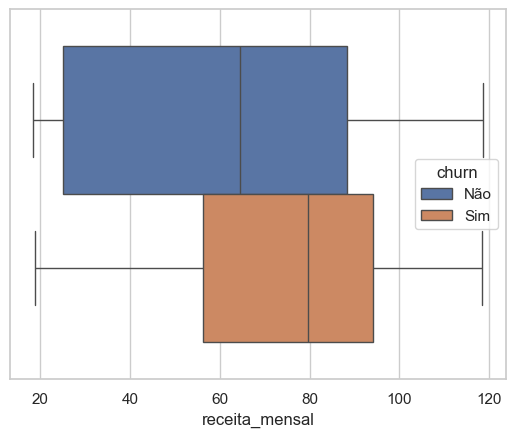

In [86]:
sns.boxplot(data=df_eda, x='receita_mensal', hue='churn')

<Axes: xlabel='receita_mensal', ylabel='Density'>

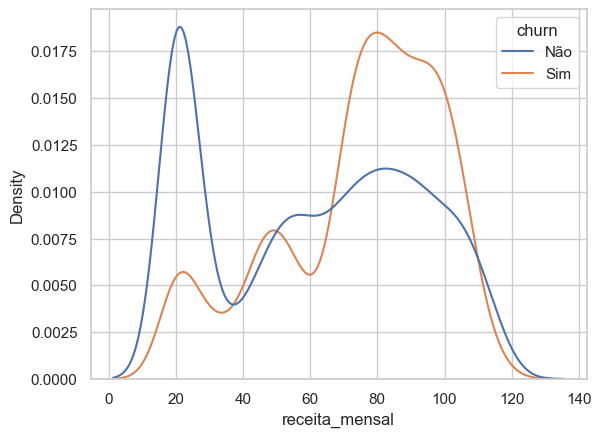

In [87]:
sns.kdeplot(data=df_eda, x='receita_mensal', hue='churn', common_norm=False)

---
Os dados sugerem uma associação moderada entre o churn e a receita mensal, dado que a distribuição das empresas que churnaram está mais concentrada nos valores mais altos quando comparada às empresas que não churnaram. Ainda assim, existe sobreposição entre os grupos.

Esse padrão indica que essa feature possui poder discriminativo em relação ao risco de churn.

### New Feature: Churn X Faixas de receita mensal

In [88]:
df_eda['grupo_receita_mensal'] = pd.cut(
    df_eda['receita_mensal'],
    bins=[20, 40, 60, 80, 100, 120]
)

In [89]:
df_eda['grupo_receita_mensal'].value_counts()

grupo_receita_mensal
(80, 100]     1764
(60, 80]      1459
(20, 40]      1182
(40, 60]      1080
(100, 120]     902
Name: count, dtype: int64

<Axes: xlabel='grupo_receita_mensal', ylabel='count'>

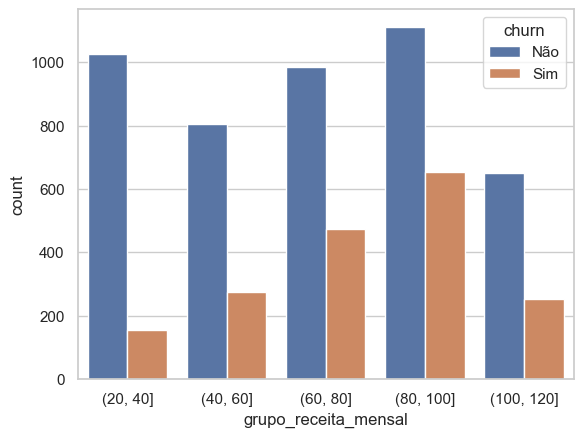

In [90]:
sns.countplot(data=df_eda, x='grupo_receita_mensal', hue='churn')

In [91]:
aux = pd.crosstab(
    df_eda['grupo_receita_mensal'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

<Axes: ylabel='grupo_receita_mensal'>

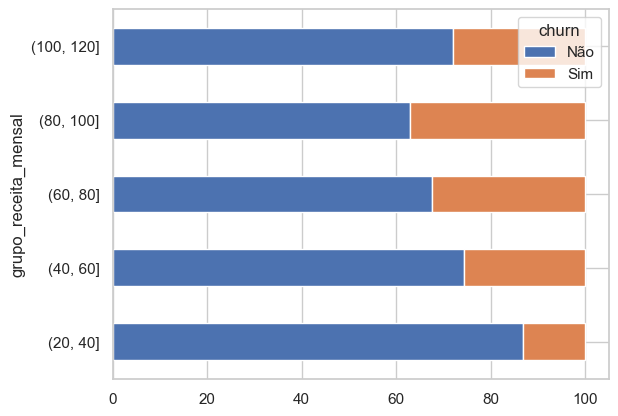

In [92]:
aux.plot(kind='barh', stacked=True)

---
Após agrupar os valores da receita mensal em faixas, os dados continuam sugerindo uma associação moderada entre o churn e a receita mensal.

Conforme foi visto anteriormente, a taxa de churn tem um aumento progressivo até as faixas intermediárias de receita e decai na faixa mais alta, indicando uma relação não linear entre a receita mensal e o churn.

Esse padrão sugere que essa feature possui moderado poder discriminativo em relação ao risco de churn.

### Churn X Receita total

In [93]:
df_eda.groupby('churn')['receita_total'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
Não,5163.0,2555.3,2329.5,18.8,577.8,1683.6,4264.1,8672.4
Sim,1869.0,1531.8,1890.8,18.8,134.5,703.6,2331.3,8684.8


<Axes: xlabel='receita_total'>

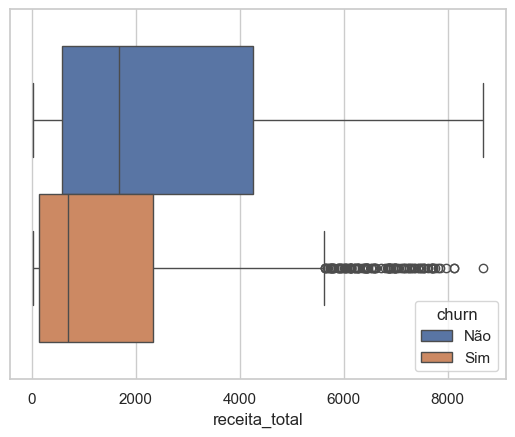

In [94]:
sns.boxplot(df_eda, x='receita_total', hue='churn')

<Axes: xlabel='receita_total', ylabel='Density'>

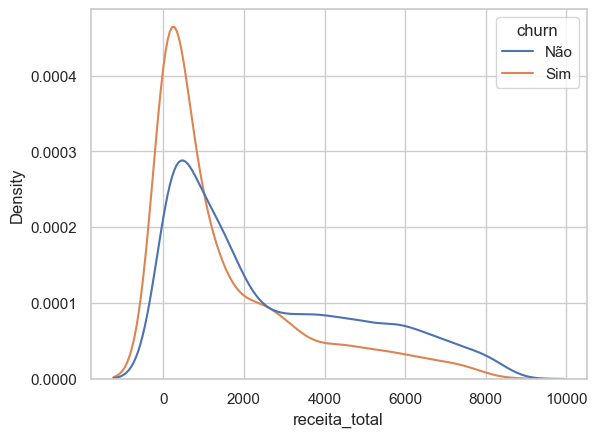

In [95]:
sns.kdeplot(data=df_eda, x='receita_total', hue='churn', common_norm=False)

---
Os dados sugerem uma associação fraca entre o churn e a receita total, dado que a distribuição das empresas que churnaram está bastante sobreposta com as que não churnaram.

Esse padrão indica que essa feature possui baixo poder discriminativo em relação ao risco de churn, quando considerada isoladamente.

### New Feature: Churn X Faixas de receita total

In [96]:
df_eda['grupo_receita_total'] = pd.cut(
    df_eda['receita_total'],
    bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 10000]
)

In [97]:
df_eda['grupo_receita_total'].value_counts()

grupo_receita_total
(0, 1000]        2893
(1000, 2000]     1283
(2000, 3000]      652
(3000, 4000]      556
(4000, 5000]      513
(5000, 6000]      443
(6000, 7000]      365
(7000, 10000]     327
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='grupo_receita_total'>

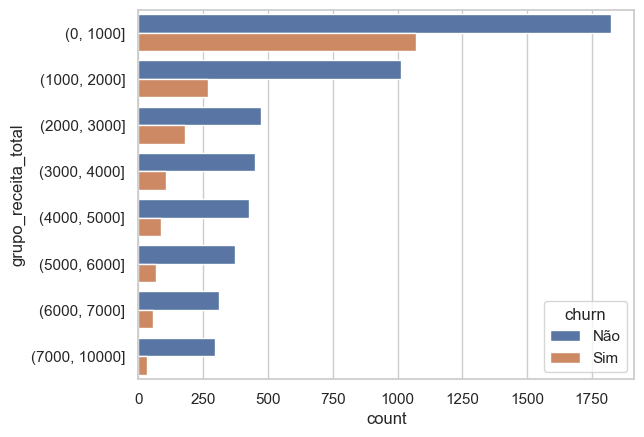

In [98]:
sns.countplot(data=df_eda, y='grupo_receita_total', hue='churn')

In [99]:
aux = pd.crosstab(
    df_eda['grupo_receita_total'],
    df_eda['churn'],
    normalize='index'
).round(3) * 100

aux

churn,Não,Sim
grupo_receita_total,,
"(0, 1000]",63.0,37.0
"(1000, 2000]",79.0,21.0
"(2000, 3000]",72.4,27.6
"(3000, 4000]",80.8,19.2
"(4000, 5000]",83.2,16.8
"(5000, 6000]",84.4,15.6
"(6000, 7000]",84.9,15.1
"(7000, 10000]",89.9,10.1


<Axes: ylabel='grupo_receita_total'>

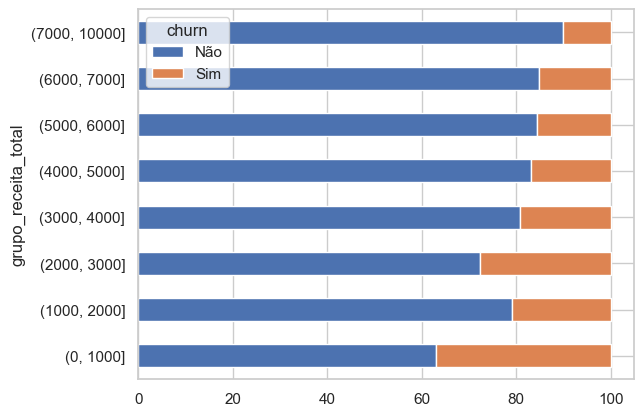

In [100]:
aux.plot(kind='barh', stacked=True)

---
Após agrupar os valores da receita total em faixas, os dados sugerem uma associação moderada entre o churn e a receita total.

A taxa de churn tem uma diminuição progressiva conforme a receita aumenta, indicando uma tendência monótona decrescente entre a receita total e o churn.

Esse padrão sugere que essa variável possui moderado poder discriminativo em relação ao risco de churn.

### Correlação entre variáveis numéricas

In [101]:
# Colunas numéricas
num_cols = [
    'fund_empresa',
    'meses_perman',
    'receita_mensal',
    'receita_total'
]

In [102]:
# Correlação
corr = df_eda[num_cols].corr(method='spearman') # Spearman porque as variáveis tem uma relação monotônica e não linear

<Axes: >

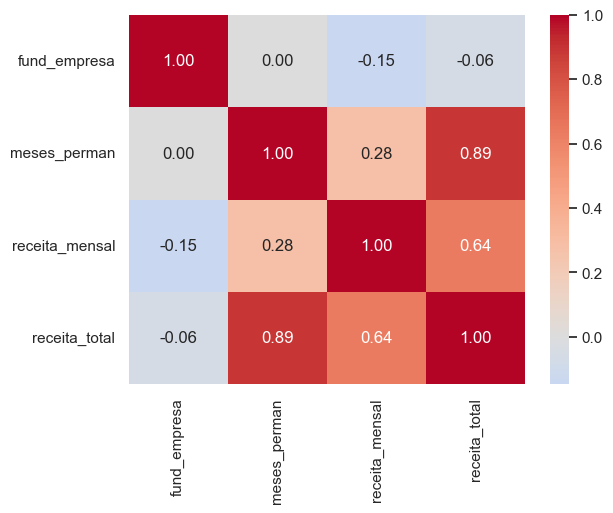

In [103]:
# Heatmap da correlação
sns.heatmap(
    data=corr,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f"
)

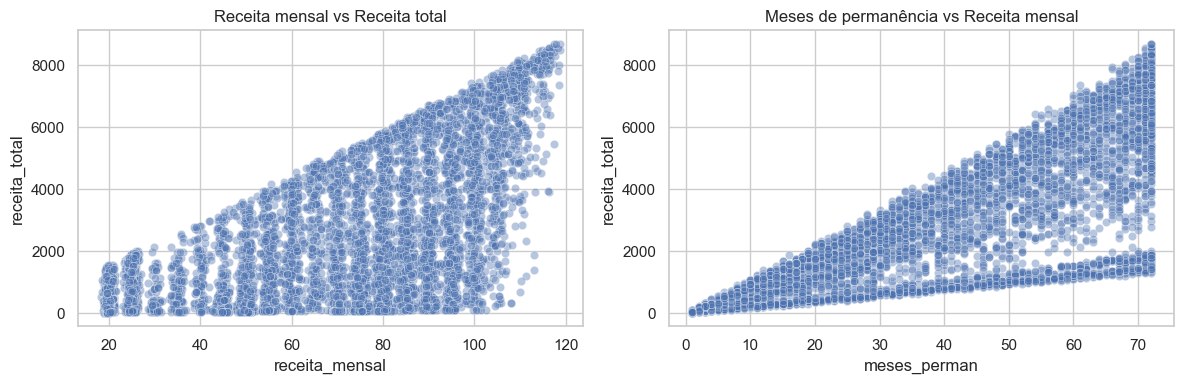

In [104]:
# Scatterplots das features com correlação relevante
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.scatterplot(
    data=df_eda,
    x='receita_mensal',
    y='receita_total',
    alpha=0.4,
    ax=axes[0]
)
axes[0].set_title('Receita mensal vs Receita total')

sns.scatterplot(
    data=df_eda,
    x='meses_perman',
    y='receita_total',
    alpha=0.4,
    ax=axes[1]
)
axes[1].set_title('Meses de permanência vs Receita mensal')

plt.tight_layout()
plt.show()

---
A análise das correlações indica:
- correlação positiva forte entre os meses de permanência e a receita total (0.89), o que é esperado dado que a receita total aumenta com o tempo de permanência.
- correlação positiva moderada entre receita mensal e total (0.64), indicando que planos mais caros não necessariamente geram maior receita acumulada.
- correlação positiva fraca entre meses de permanência e receita mensal (0.28).

A correlação mostra que a feature de receita anual não é independente pois carrega muita informação da receita mensal e tempo de permanência e por isso deve ser tratada com cautela em modelos que podem sofrer com colinearidade.

## Multivariated Analysis

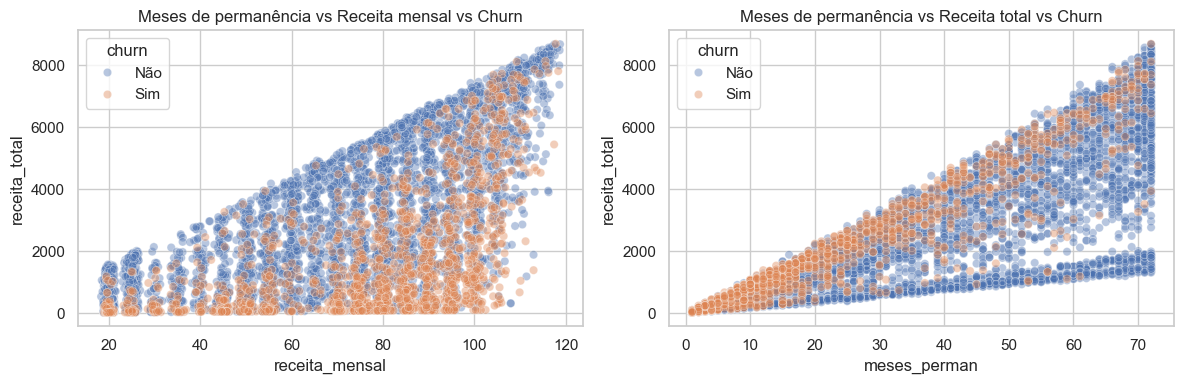

In [105]:
# Scatterplots das features com correlação relevante + churn
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.scatterplot(
    data=df_eda,
    x='receita_mensal',
    y='receita_total',
    hue='churn',
    alpha=0.4,
    ax=axes[0]
)
axes[0].set_title('Meses de permanência vs Receita mensal vs Churn')

sns.scatterplot(
    data=df_eda,
    x='meses_perman',
    y='receita_total',
    hue='churn',
    alpha=0.4,
    ax=axes[1]
)
axes[1].set_title('Meses de permanência vs Receita total vs Churn')

plt.tight_layout()
plt.show()

---
A visualização multivariada sugere que há maior concentração de churn nas faixas mais baixas de receita acumulada.

A partir da faixa intermediária de receita mensal, observa-se uma maior dispersão visual pelas faixas de receita total, refletindo a existência de churn por diversos perfis de clientes.

Além disso, é possível visualizar uma concentração elevada de ocorrências de churn nos primeiro meses de permanência e uma diminuição desta progressivamente ao longo do tempo.

## Resumo executivo

O objetivo deste projeto foi analisar a incidência de churn e os fatores que o influenciam. Foi elaborada uma análise a partir dos dados cadastrais de nossos clientes, dos contratos que firmaram conosco e de seu comportamento na nossa plataforma.

Foi constatado que o churn está muito associado à frequência de uso das nossas ferramentas. O ponto crítico corresponde ao grupo de empresas com menor frequência de uso da nossa plataforma, sugerindo uma possível fricção no processo de adoção o que faz com que muitas desistam no meio do caminho. Além disto, vimos que empresas com menor tempo de permanência tendem a churnar muito mais do que as que tem mais tempo, reiterando a ideia de que temos um problema de aderência inicial.

Observou-se também que empresas que fazem contratos com abrangência mensal churnam muito mais do que as que fazem contratos mais longos, o que corrobora com a análise acima. Juntamente, vemos que os contratos mais baratos tendem ao churn.

Por fim, foi observado que empresas maiores tendem a churnar menos que empresas menores (entende-se por empresa maior, neste estudo, aquelas que tem maior quadro societário e número de funcionários), reforçando a relação entre maturidade empresarial e retenção. 

## Recomendações práticas

Com base no que foi observado na análise, seguem propostas de ações a serem tomadas, organizadas por prioridade e impacto na diminuição do churn.

#### 1. Redução da fricção no processo de adoção (Alta prioridade)

Recomenda-se que seja realizado um teste de usabilidade com foco no fluxo de navegação e na experiência do usuário, dado que uma hipótese plausível é a existência de fricção nos períodos iniciais da adoção de nossa plataforma.

Paralelamente, sugere-se a elaboração de uma pesquisa de satisfação e a análise de dados do Analytics para identificarmos pontos de abandono e dificuldade na jornada do usuário.

Adicionalmente, recomenda-se o desenvolvimento de conteúdo educativo, como tutoriais em vídeo e materiais guiados, facilitando o onboarding e ajudando a converter os usuários recentes em frequentes.

#### 2. Estratégia para aumento de engajamento e retenção inicial (Média prioridade)

Foi observado que clientes engajados apresentam grande diminuição no risco de churn. Por isso, sugiro a criação de uma equipe de suporte personalizado com foco no atendimento e treinamento com priorização dos clientes que fazem baixo uso das nossas ferramentas ou têm alto risco de evasão.

#### 3. Incentivo a adoção de contratos mais longos (Média prioridade)

Observou-se uma alta taxa de churn relacionada aos contratos feitos mensalmente em relação aos com maior abrangência.
Recomenda-se um estudo conjunto entre as áreas de negócio e de marketing visando a elaboração de estratégias de incentivo à contratação de planos anuais, permitindo maior tempo de maturação e aumento de aderência ao nosso produto.

#### 4. Uso de modelos de Machine Learning para segmentação e priorização (Médio / longo prazo)

Como evolução da análise, sugere-se o desenvolvimento de dois modelos de apoio à decisão:

- Um modelo de clusterização não supervisionado para segmentarmos os usuários de acordo com o seu nível de engajamento (baixo, médio e alto). Essa segmentação pode orientar campanhas, melhoria de produtos e monitorar o impacto das ações implementadas,
- Um modelo de classificação com abordagem de rank para estimar e priorizar clientes de acordo com sua propensão ao churn. Esse modelo pode apoiar ações mais incisivas e pontuais, como contato personalizado, treinamentos direcionados ou ofertas promocionais para extensão do tempo contratual.